In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings('ignore')

# Imports, Load CSV


In [3]:
df1 = pd.read_csv('capstonewrangled.csv', index_col=0, low_memory=False)




In [4]:
df1.columns.to_list()

['Accident_Index',
 '1st_Road_Class',
 '1st_Road_Number',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Accident_Severity',
 'Carriageway_Hazards',
 'Date',
 'Day_of_Week',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Junction_Control',
 'Junction_Detail',
 'Latitude',
 'Light_Conditions',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 'Longitude',
 'Number_of_Casualties',
 'Number_of_Vehicles',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Police_Force',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Speed_limit',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Year_x',
 'InScotland',
 'Age_Band_of_Driver',
 'Age_of_Vehicle',
 'Driver_Home_Area_Type',
 'Driver_IMD_Decile',
 'Engine_Capacity_.CC.',
 'Hit_Object_in_Carriageway',
 'Hit_Object_off_Carriageway',
 'Journey_Purpose_of_Driver',
 'Junction_Location',
 'make',
 'model',
 'Propulsion_Code',
 'Sex_of_Driver',
 'Skidding_and_Overturning',
 '

# Feature Selection

There are certain categories for this project which will not be used as predictors/features for the purpose of this project. For this project, I am attempting to look at variable/features that are available prior to the accident, and thus could be predictive of the future severity of new accidents. While the dataset contains tons of valuable information on location as well, the purpose is to not use the future generated model to generalize by location either, so all variables that have location, or are a proxy for location, will be removed. 

In [5]:
#list of features to be removed and reasoning

ls = ['Did_Police_Officer_Attend_Scene_of_Accident',#Post incident
      'Number_of_Casualties',#A possible other target variable, but at this time not being investigate.Post-incident variable
      'Hit_Object_in_Carriageway',#Post incident
      'Hit_Object_off_Carriageway',#Post incident
      'Skidding_and_Overturning',#Post incident
      'X1st_Point_of_Impact',#Post incident
      'Carriageway_Hazards',#Post incident
      'Police_Force',#Location based
      "InScotland",#Location based
      'Local_Authority_(District)',#Location based
      'Local_Authority_(Highway)',#Location based
      'Driver_Home_Area_Type',#rural or urban etc. Location based
      "Driver_IMD_Decile",#location based - a calculated score
      'Number_of_Vehicles',#Post incident
      'Year_x',#duplicate year from Merge
      '1st_Road_Number',#irrelevant - location based
      '2nd_Road_Number', #irrelevant - location based
      'Latitude', #location based
      'Longitude',#location based
      "Year_y",#duplicate found in date
      'Urban_or_Rural_Area'#location based
     ]

In [6]:
#drop all of the above columns
df = df1.drop(ls, axis=1)

In [7]:
#Select at numeric features and run pairplot to explore
numdf = df.select_dtypes(include=['float64', 'int64'])
numdf.head(3)

,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Age_of_Vehicle,Engine_Capacity_.CC.,Vehicle_Location.Restricted_Lane,Vehicle_Reference
0,0.0,5.0,30.0,3.0,8268.0,0.0,1
1,0.0,0.0,30.0,5.0,8300.0,0.0,1
2,0.0,0.0,30.0,4.0,1769.0,0.0,1


# Simple Distributions of Numerical Features


array([[<AxesSubplot:title={'center':'Pedestrian_Crossing-Human_Control'}>,
        <AxesSubplot:title={'center':'Pedestrian_Crossing-Physical_Facilities'}>,
        <AxesSubplot:title={'center':'Speed_limit'}>],
       [<AxesSubplot:title={'center':'Age_of_Vehicle'}>,
        <AxesSubplot:title={'center':'Engine_Capacity_.CC.'}>,
        <AxesSubplot:title={'center':'Vehicle_Location.Restricted_Lane'}>],
       [<AxesSubplot:title={'center':'Vehicle_Reference'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

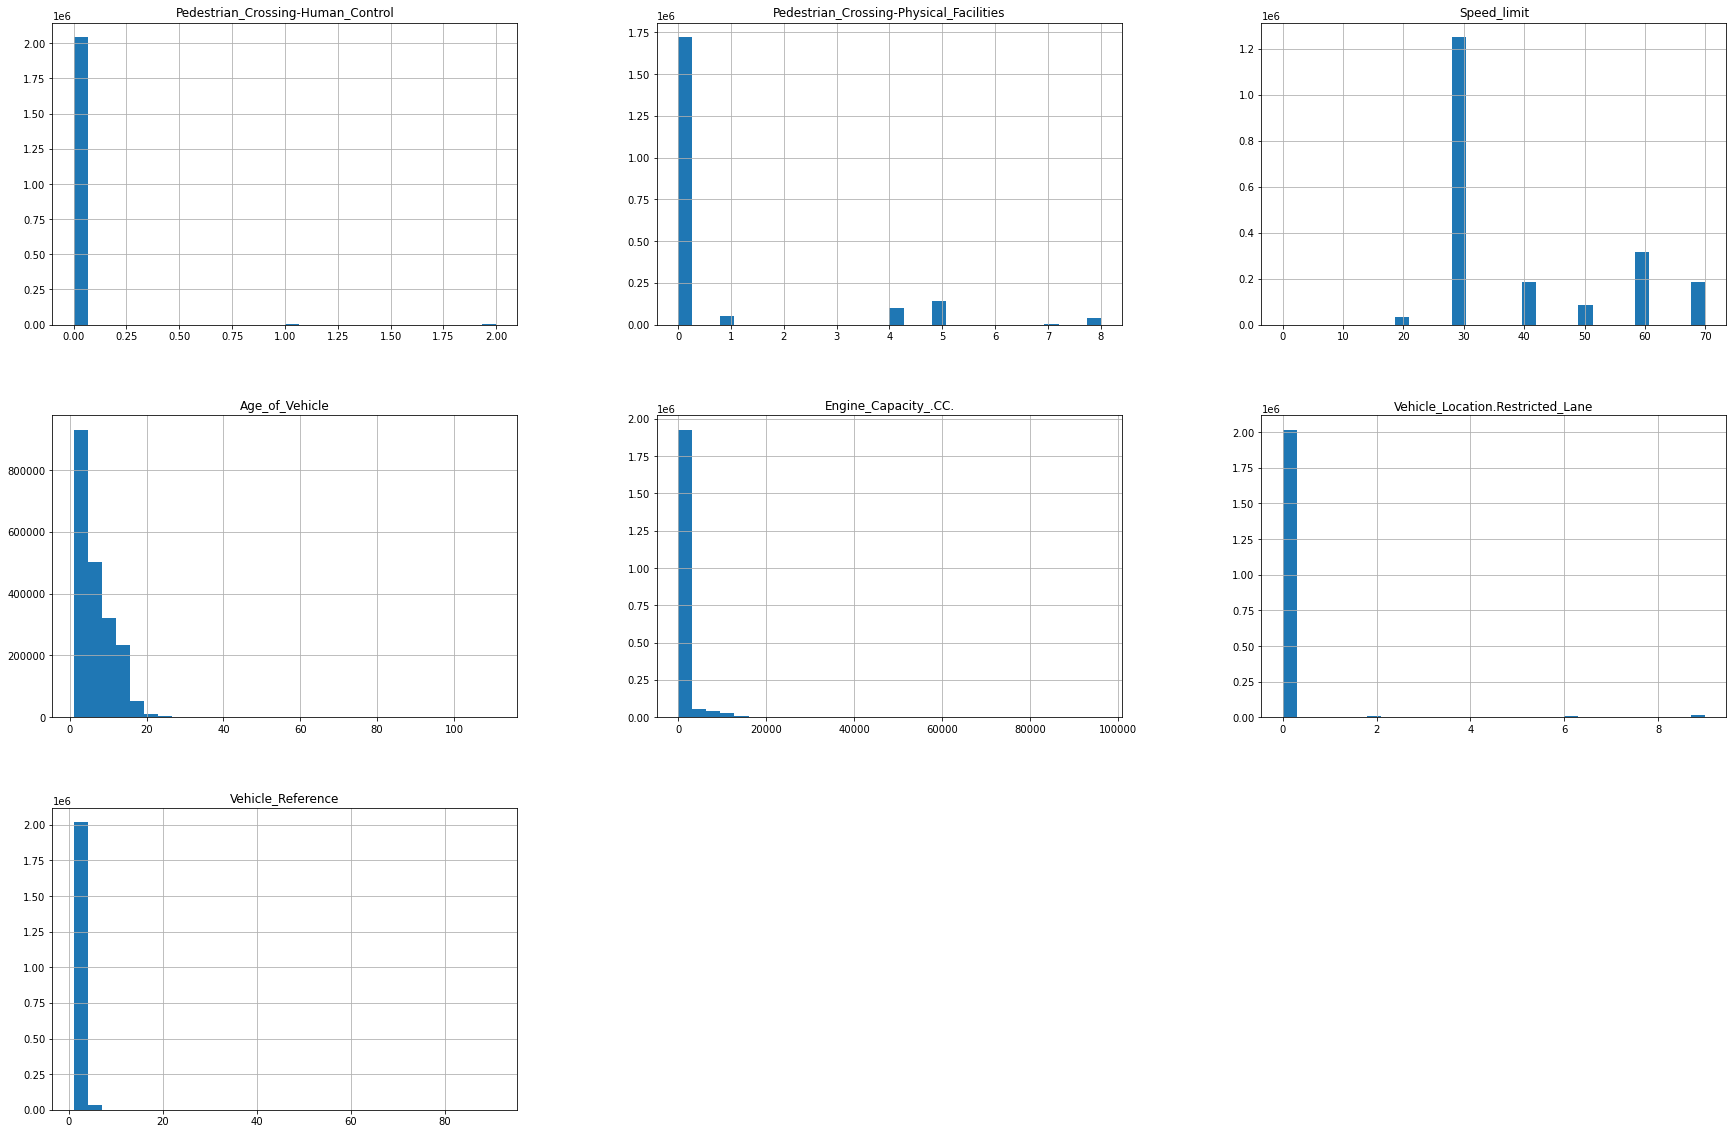

In [8]:
#Basic plots of Numerical Features
numdf.hist(bins=30, figsize =(30,20))

Reviewing the above plots I have a target that is categorical, and the only continuous variables I are age of vehicles and  engine capacity. because of this, a pairplot or ploting correlations does not make much sense. 

# Looking at Categorical Features

In [9]:
#Select Categorial Columns
catdf = df.select_dtypes(include=['object'])

In [10]:
catlist =  catdf.columns.to_list()
catlist

['Accident_Index',
 '1st_Road_Class',
 '2nd_Road_Class',
 'Accident_Severity',
 'Date',
 'Day_of_Week',
 'Junction_Control',
 'Junction_Detail',
 'Light_Conditions',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Time',
 'Weather_Conditions',
 'Age_Band_of_Driver',
 'Journey_Purpose_of_Driver',
 'Junction_Location',
 'make',
 'model',
 'Propulsion_Code',
 'Sex_of_Driver',
 'Towing_and_Articulation',
 'Vehicle_Leaving_Carriageway',
 'Vehicle_Manoeuvre',
 'Vehicle_Type',
 'Was_Vehicle_Left_Hand_Drive']

# Subset by Target Categories - Slight - Serious - Fatal

In [11]:
#Subset by each category + [Slight, Serious, Fatal]

sli = df[df['Accident_Severity'] == 'Slight']
ser = df[df['Accident_Severity'] == 'Serious']
fat = df[df['Accident_Severity'] == 'Fatal']

In [12]:
#Create Datetime Column from Date and Time columns
df['Datetime'] = df.Date +" "+ df.Time
df['Datetime'] = pd.to_datetime(df.Datetime, infer_datetime_format=True)

# Define Seaborn Catplot Functions

Here I defined two functions to graph my categorical featues vs my target(also categorical). "lookcat" and "invlookcat" which simply switches what the axis.( I.e. x vs. y. to y vs x. )

In [13]:
def lookcat(cat, df=df, height=7, aspect=2.5, rot=0, font=1, hue_order=['Fatal', 'Serious', 'Slight'],palette=sns.color_palette(['r','y','b'])):
    grouped2 = df.groupby(['Accident_Severity',cat]).size().reset_index(name="Count")
    sns.set(font_scale = font)
    g= sns.catplot(x=cat,
            y='Count',
            data=grouped2,
            hue='Accident_Severity',
            kind='bar',
            height=7,
            aspect = 2.5,
            hue_order=['Fatal', 'Serious', 'Slight'],
            palette=sns.color_palette(['r','y','b']))
    plt.xticks(rotation=rot)
    g.fig.suptitle('Accident Severity Frequency by {}'.format(cat))

In [14]:
def invlookcat(cat, df=df, height=7, aspect=2.5, rot=90, font = 1, order=['Fatal', 'Serious', 'Slight'],palette=sns.color_palette(['r','y','b'])):
    grouped2 = df.groupby(['Accident_Severity',cat]).size().reset_index(name="Count")
    sns.set(font_scale = font)
    g= sns.catplot(x='Count',
            y=cat,
            data=grouped2,
            hue='Accident_Severity',
            kind='bar',
            height=7,
            aspect = 2.5,
            hue_order=['Fatal', 'Serious', 'Slight'],
            palette=sns.color_palette(['r','y','b']))
    plt.xticks(rotation=rot)
    g.fig.suptitle('Accident Severity Frequency by {}'.format(cat))

# Time Series Exploration

Text(0.5, 0.98, 'Severity Explored by Hour of Day')

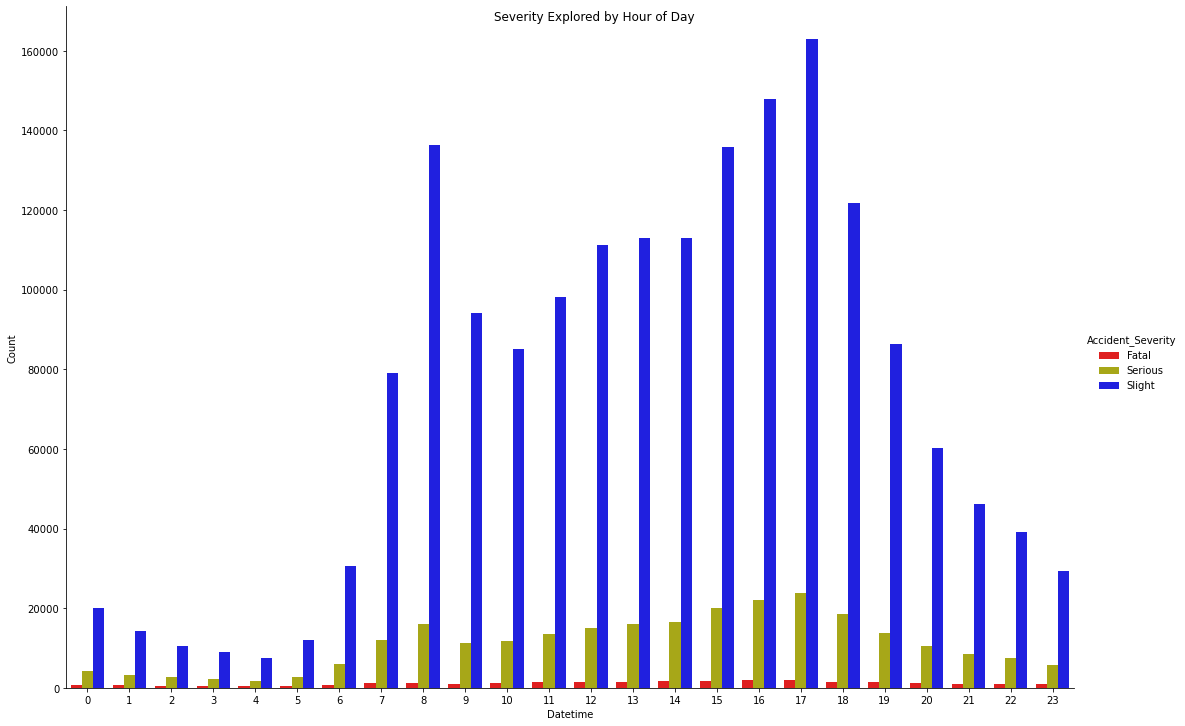

In [15]:
grouped2 = df.groupby(['Accident_Severity', df.Datetime.dt.hour]).size().reset_index(name="Count")
g= sns.catplot(x='Datetime',
            y='Count',
            data=grouped2,
            hue='Accident_Severity',
            kind='bar',
            height=10,
            aspect = 1.5,
            hue_order=['Fatal', 'Serious', 'Slight'],
            palette=sns.color_palette(['r','y','b']))
g.fig.suptitle('Severity Explored by Hour of Day')

In [16]:
serfat = ser.append(fat)
serfat.head(2)

,Accident_Index,1st_Road_Class,2nd_Road_Class,Accident_Severity,Date,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Pedestrian_Crossing-Human_Control,...,model,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive
18,200501BS00022,A,Unclassified,Serious,2005-01-08,Saturday,Give way or uncontrolled,T or staggered junction,Darkness - lights lit,0.0,...,ACCORD VTEC SPORT,Petrol,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No
39,200501BS70029,B,Unclassified,Serious,2005-02-15,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lights lit,0.0,...,ZX 600-G1,Petrol,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle over 500cc,No


Text(0.5, 0.98, 'Serious/Fatal Explored by Hour of Day')

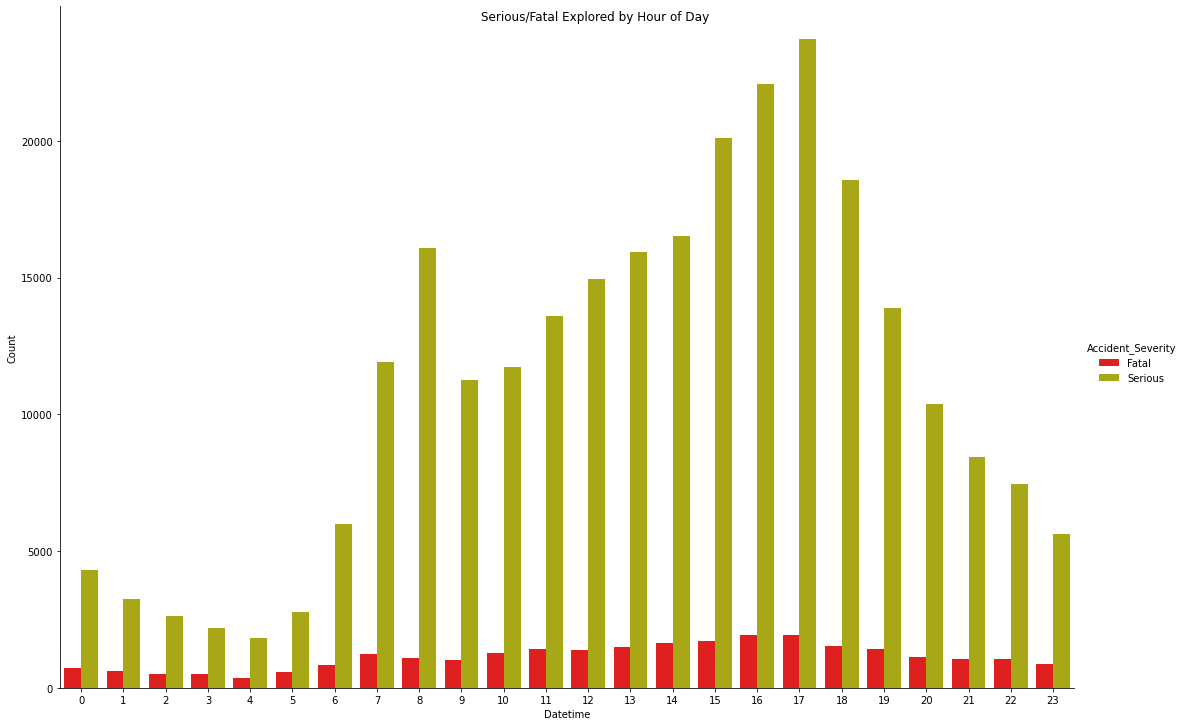

In [17]:
grouped2 = serfat.groupby(['Accident_Severity', df.Datetime.dt.hour]).size().reset_index(name="Count")
g= sns.catplot(x='Datetime',
            y='Count',
            data=grouped2,
            hue='Accident_Severity',
            kind='bar',
            height=10,
            aspect = 1.5,
            hue_order=['Fatal', 'Serious'],
            palette=sns.color_palette(['r','y','b']))
g.fig.suptitle('Serious/Fatal Explored by Hour of Day')


Text(0.5, 0.98, 'Severity Explored by Month of Year')

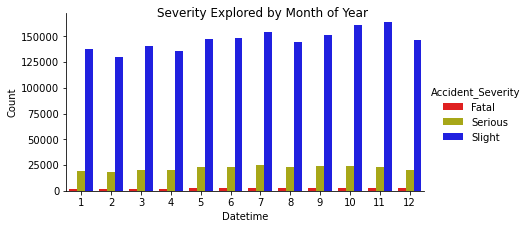

In [18]:
grouped2 = df.groupby(['Accident_Severity', df.Datetime.dt.month]).size().reset_index(name="Count")
g= sns.catplot(x='Datetime',
            y='Count',
            data=grouped2,
            hue='Accident_Severity',
            kind='bar',
            height=3,
            aspect = 2,
            hue_order=['Fatal', 'Serious', 'Slight'],
            palette=sns.color_palette(['r','y','b'])
              )
g.fig.suptitle('Severity Explored by Month of Year')

In [19]:
#sns.catplot(y='2nd_Road_Class', data=fatalsubset, kind='count')


This shows 2nd_Road_Class to be not a greate predictor, and I will drop it. 

In [20]:
#df.drop(columns = ['2nd_Road_Class'],inplace=True)

In [21]:
#Count of categorical Variables 
print(len(catlist))
catlist

26


['Accident_Index',
 '1st_Road_Class',
 '2nd_Road_Class',
 'Accident_Severity',
 'Date',
 'Day_of_Week',
 'Junction_Control',
 'Junction_Detail',
 'Light_Conditions',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Time',
 'Weather_Conditions',
 'Age_Band_of_Driver',
 'Journey_Purpose_of_Driver',
 'Junction_Location',
 'make',
 'model',
 'Propulsion_Code',
 'Sex_of_Driver',
 'Towing_and_Articulation',
 'Vehicle_Leaving_Carriageway',
 'Vehicle_Manoeuvre',
 'Vehicle_Type',
 'Was_Vehicle_Left_Hand_Drive']

In [22]:
dflist = df.columns.to_list()

# Severity By Categorical Features

This section explores the categorical features vs Accident Severity. I have defined functions to plot all levels of severities on one plot. I then subset that by fat and plot the fatilities in the same format below, the same format applies throughout the exploaration of these features

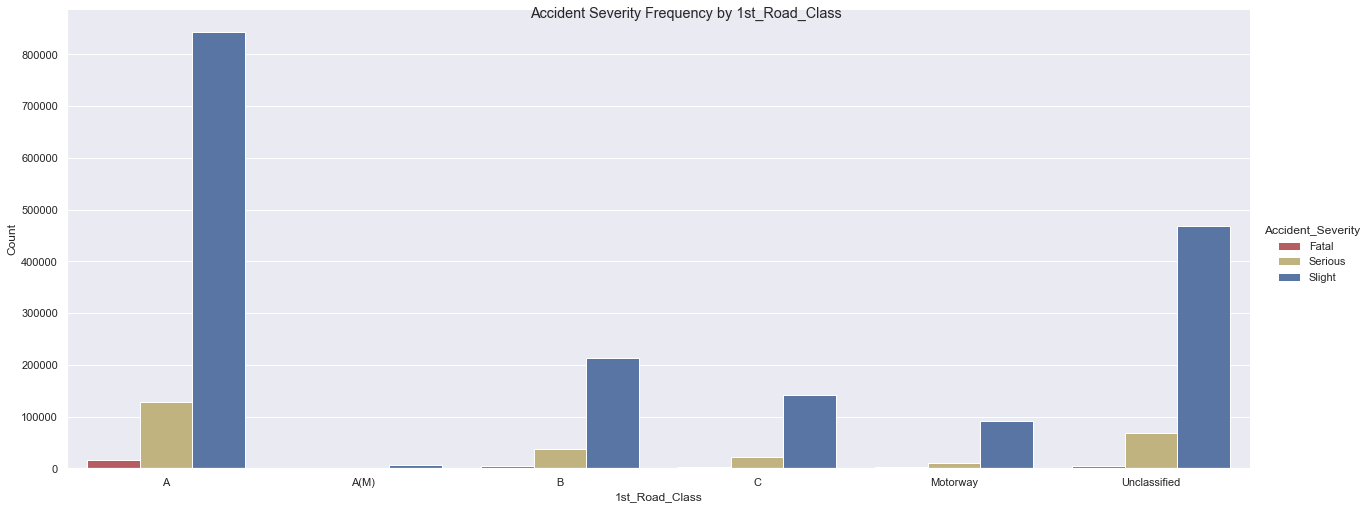

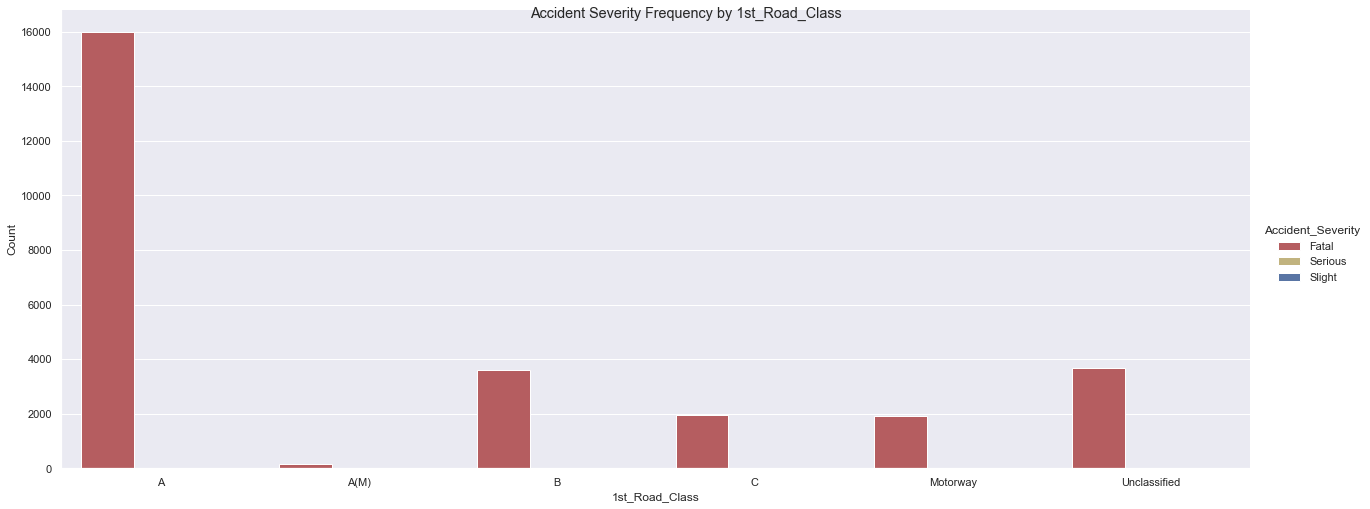

In [23]:
# 1st Road Class
lookcat(catlist[1], df)
# 1st Road Class - Fatal
lookcat(catlist[1], fat)

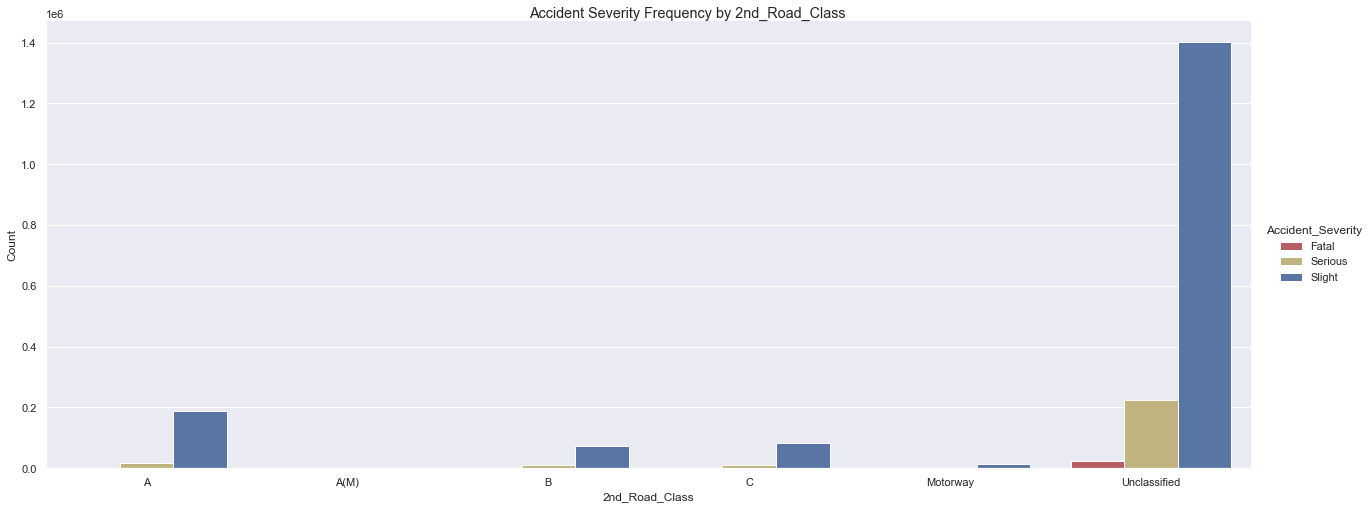

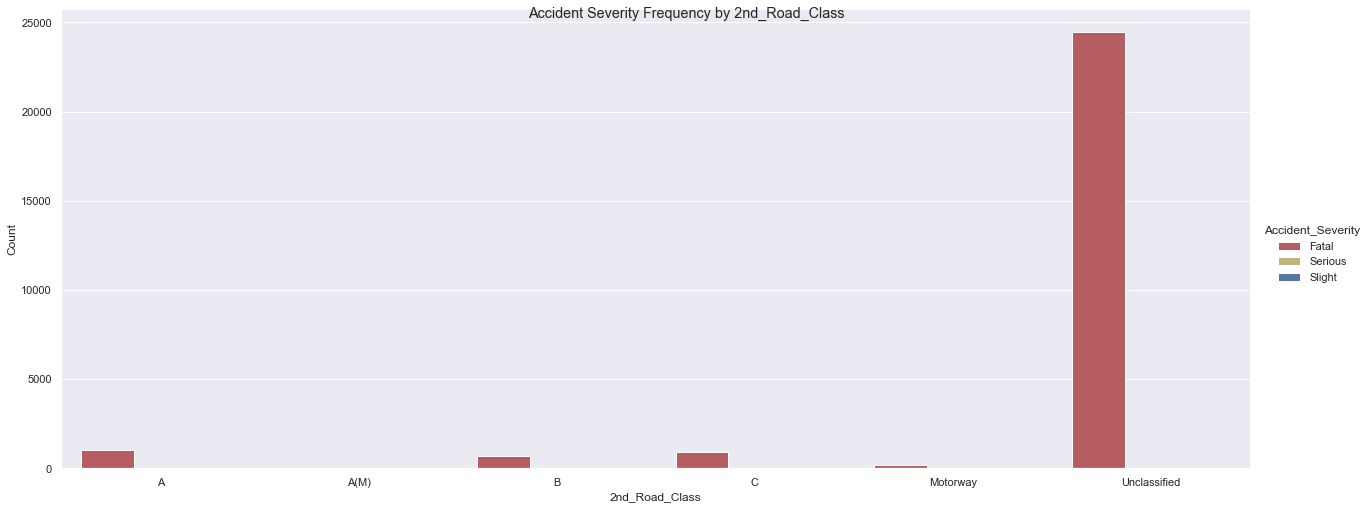

In [24]:
# 2nd Road Class - All
lookcat(catlist[2], df)
# 2nd Road Class - Fatal
lookcat(catlist[2], fat)

In [25]:
#Dop this column, majority of Values are unlassified
df.drop(columns = ['2nd_Road_Class'],inplace=True)

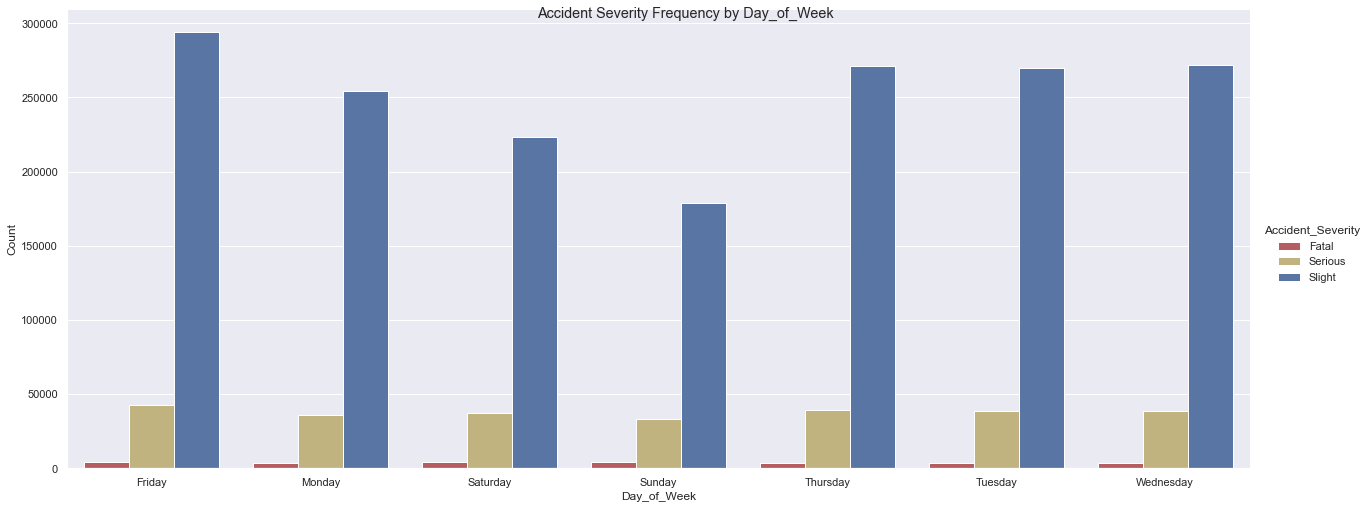

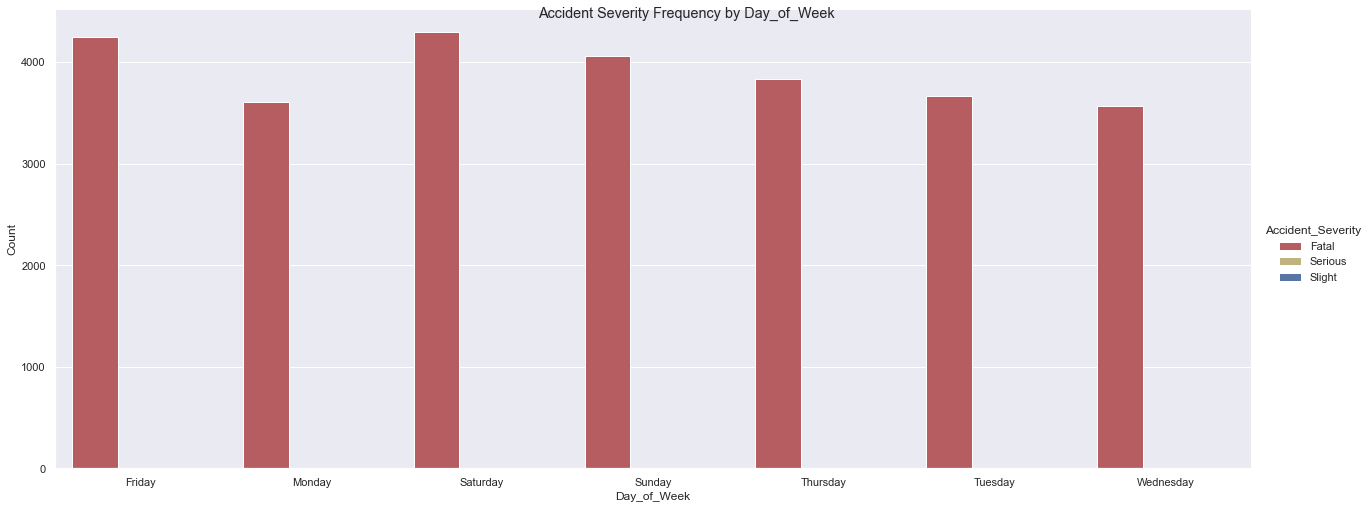

In [26]:
lookcat(catlist[5], df)
lookcat(catlist[5],fat)    

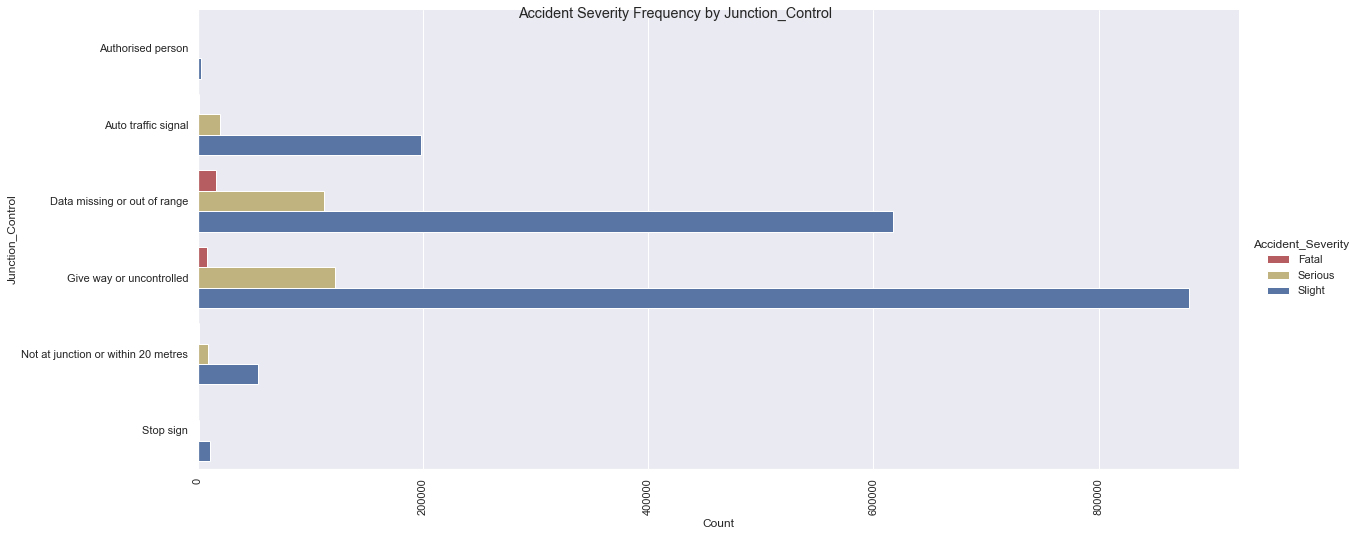

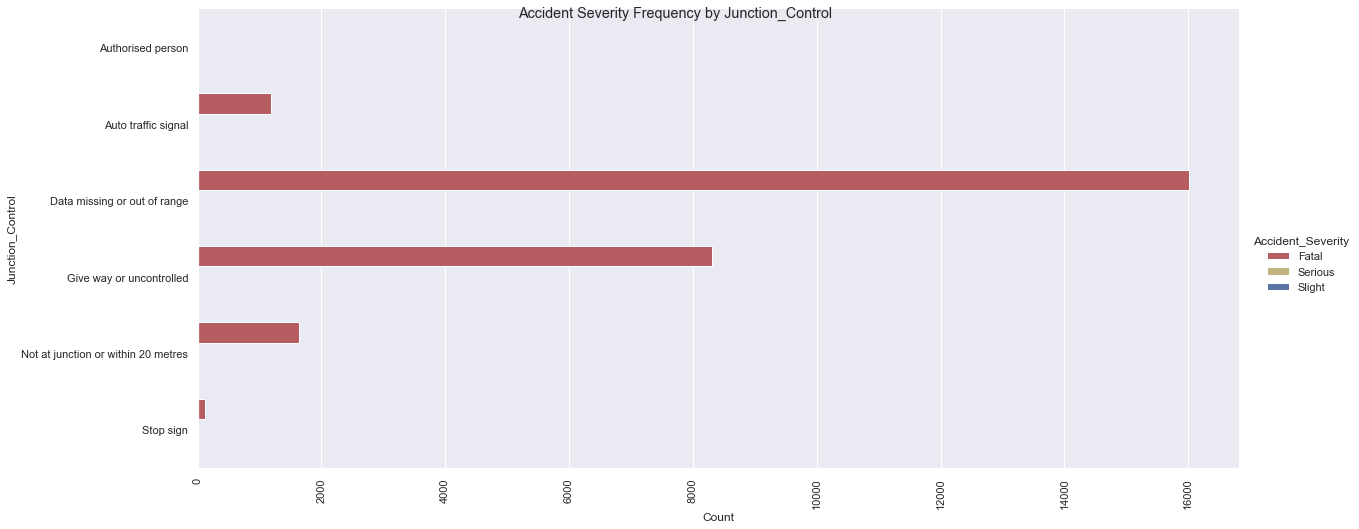

In [27]:
invlookcat(catlist[6],df)
invlookcat(catlist[6],fat)


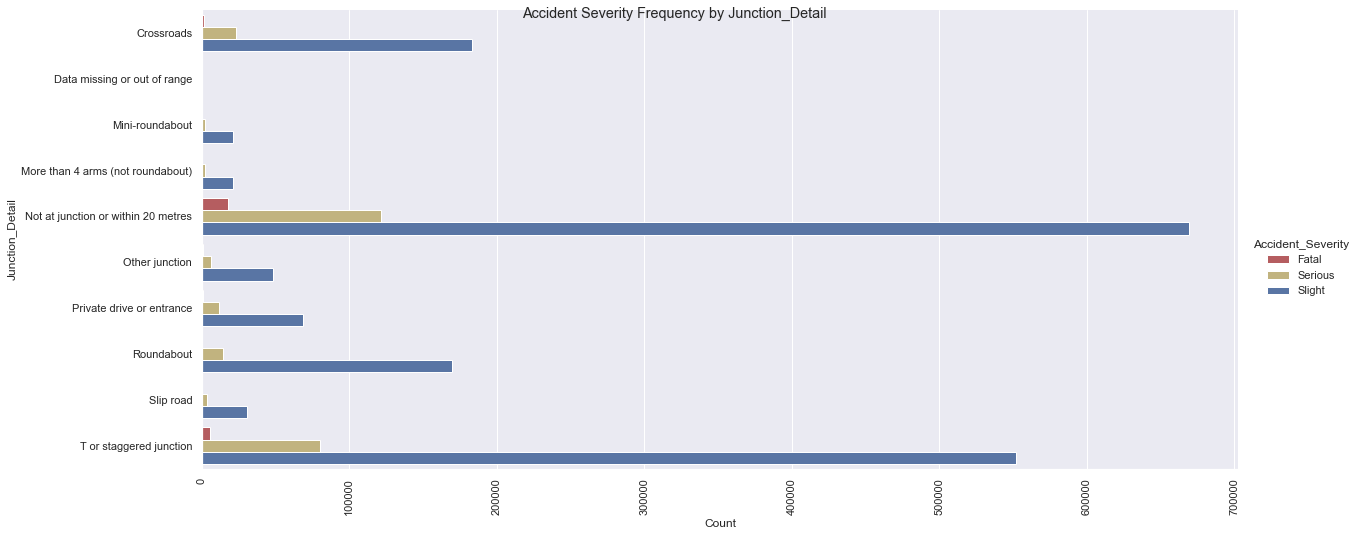

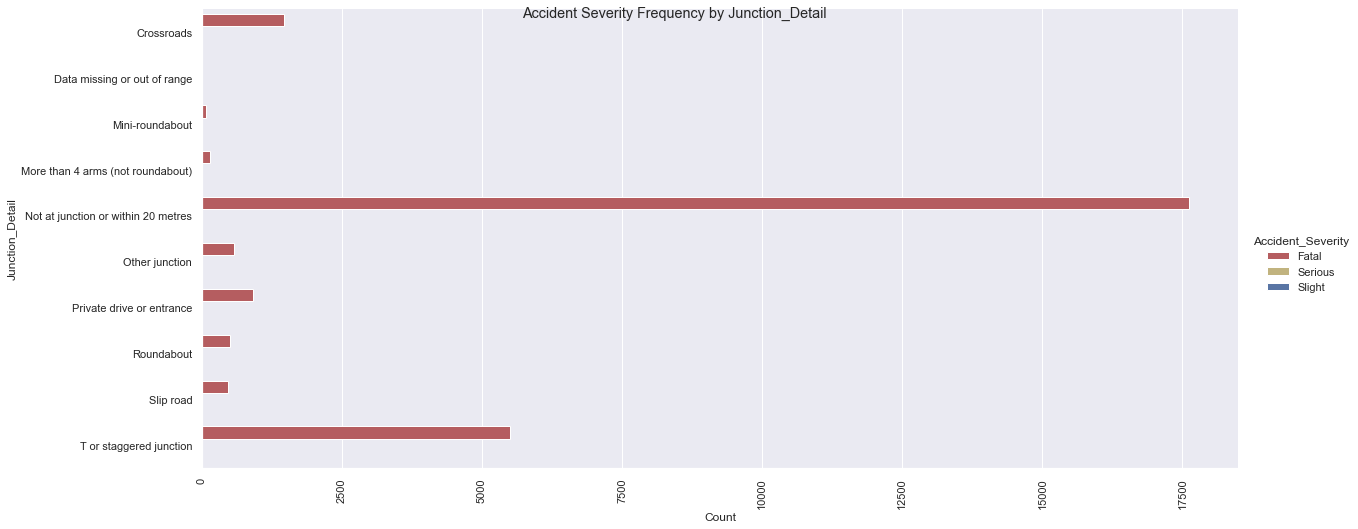

In [28]:
invlookcat(catlist[7],df)
invlookcat(catlist[7],fat)

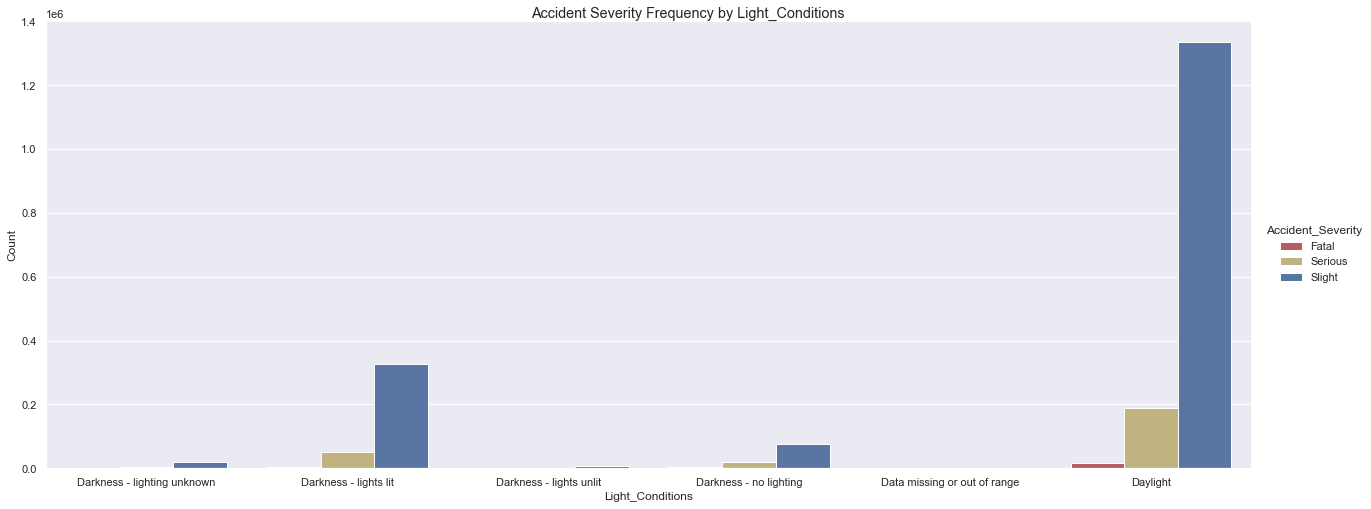

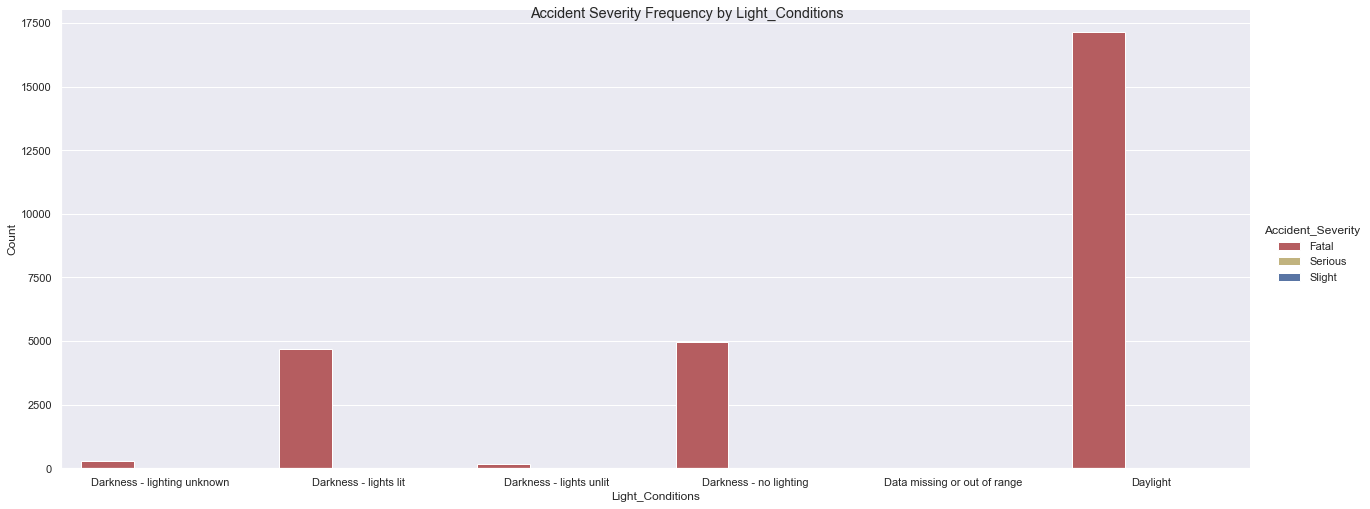

In [29]:
lookcat(catlist[8],df)
lookcat(catlist[8],fat)


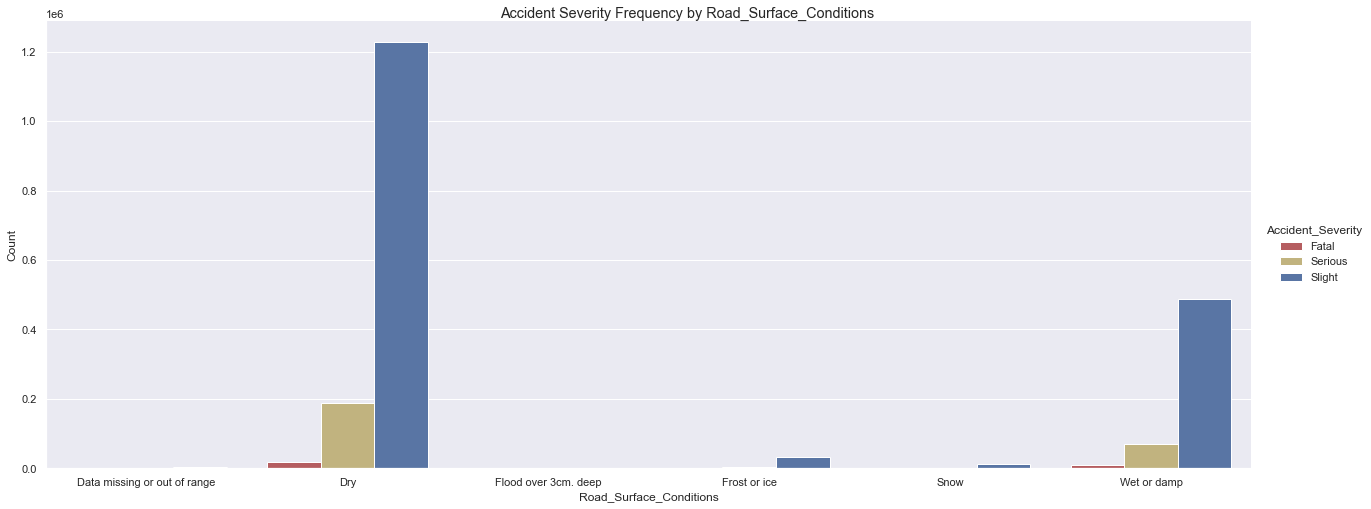

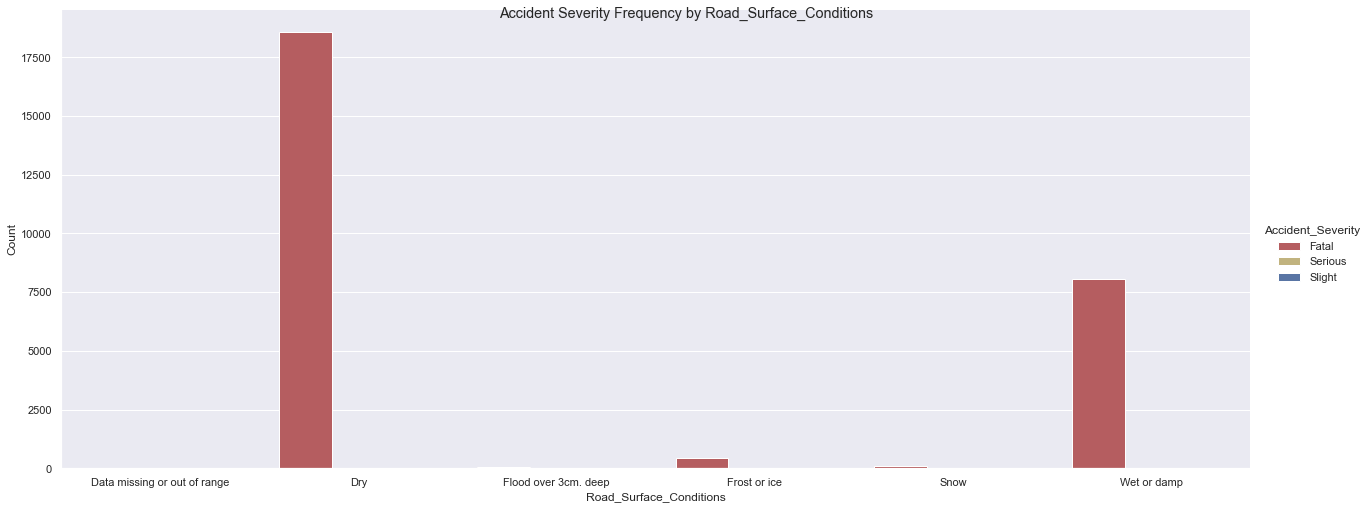

In [30]:
lookcat(catlist[9],df)
lookcat(catlist[9],fat)

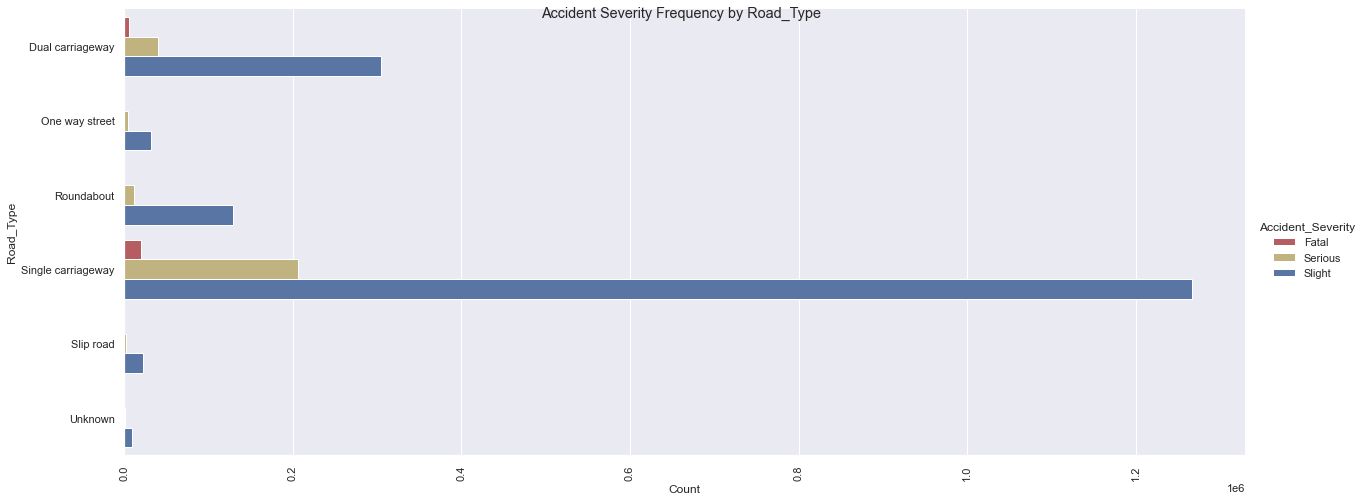

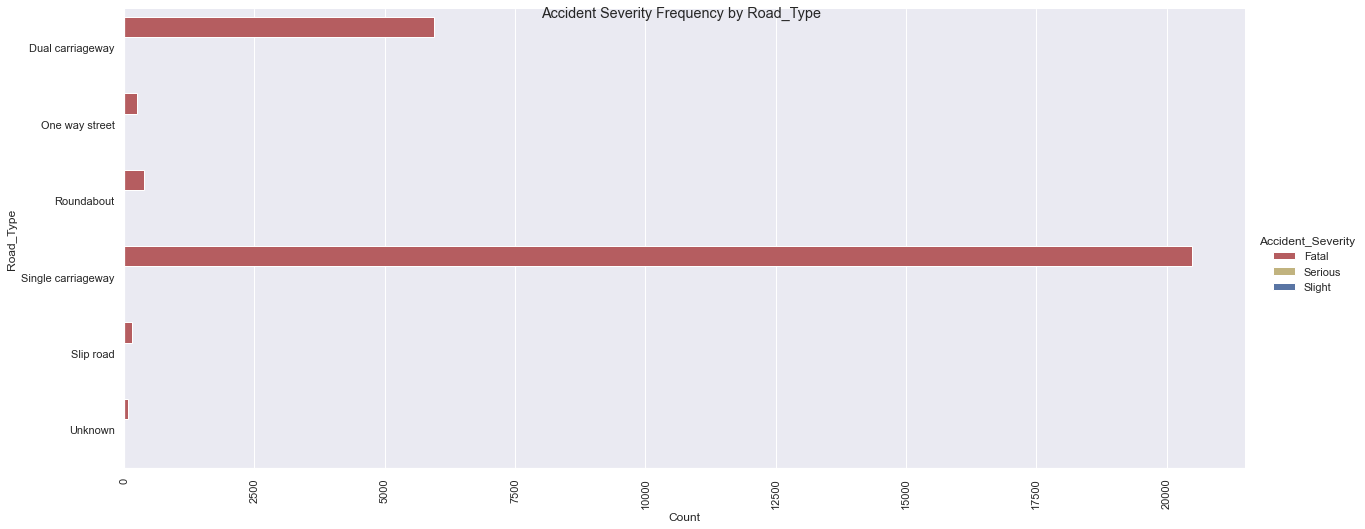

In [31]:
invlookcat(catlist[10],df)
invlookcat(catlist[10],fat)

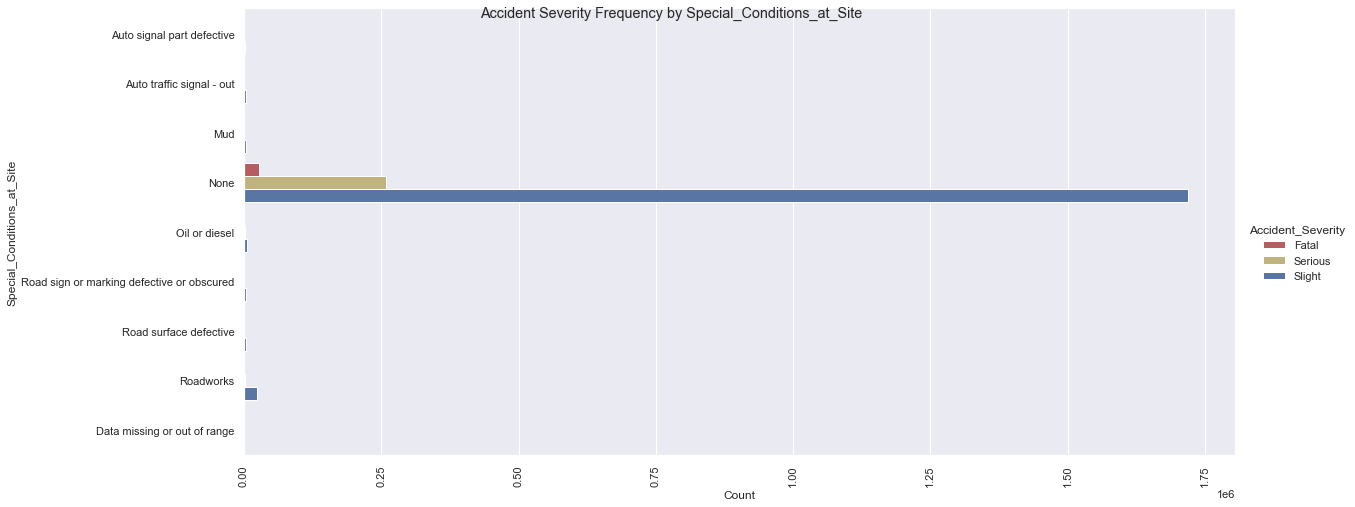

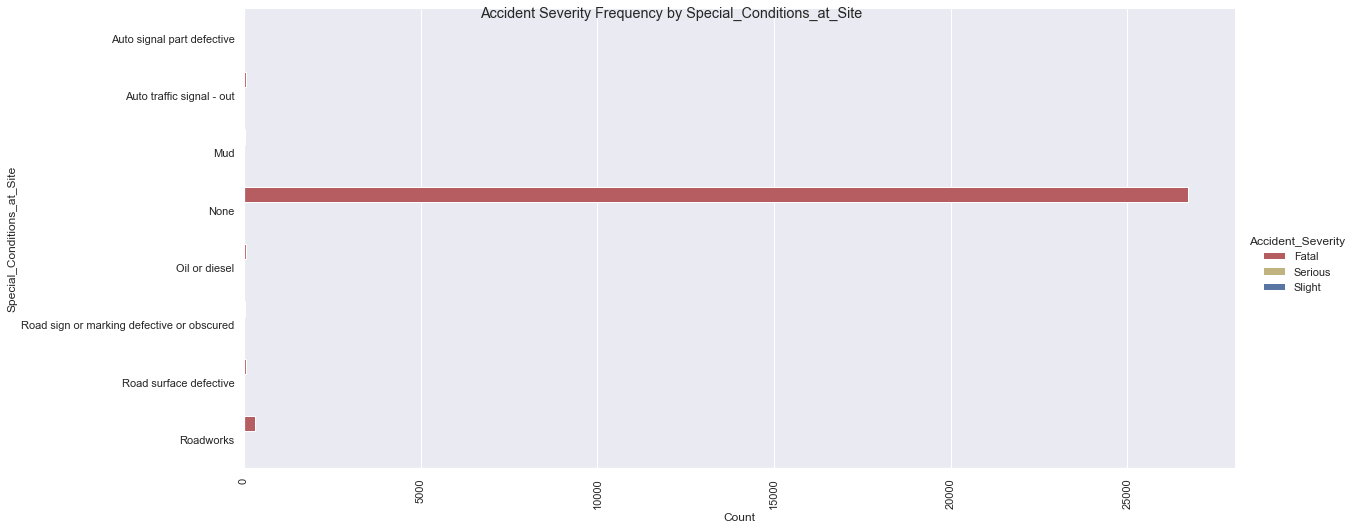

In [32]:
invlookcat(catlist[11],df)
invlookcat(catlist[11],fat)

In [33]:
#Time explored as part of Datetime Above

catlist[12]


'Time'

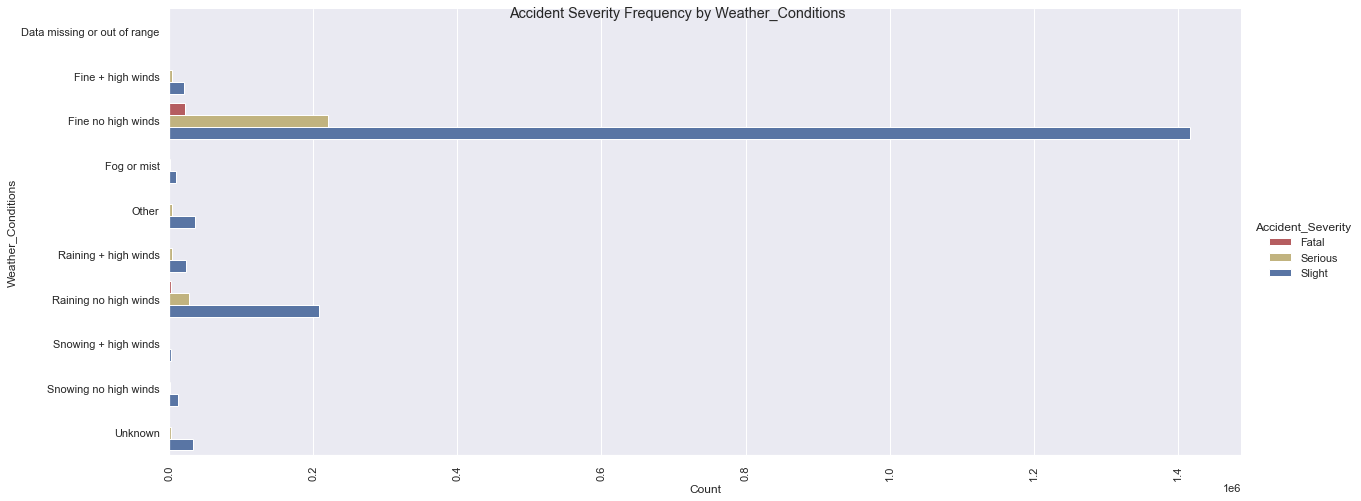

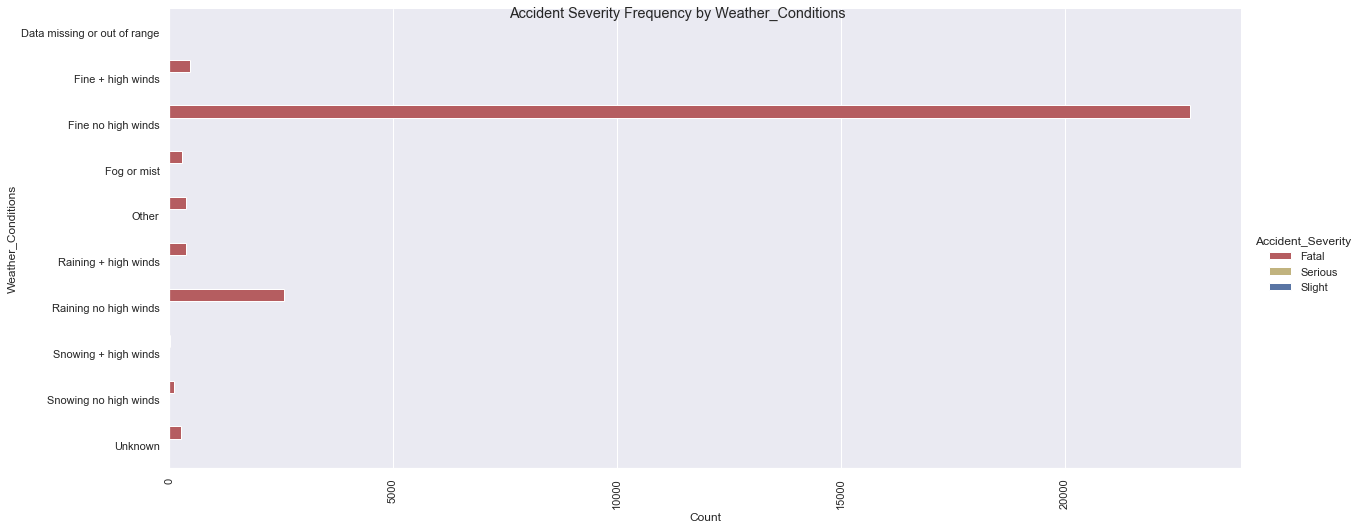

In [34]:
invlookcat(catlist[13],df)
invlookcat(catlist[13],fat)

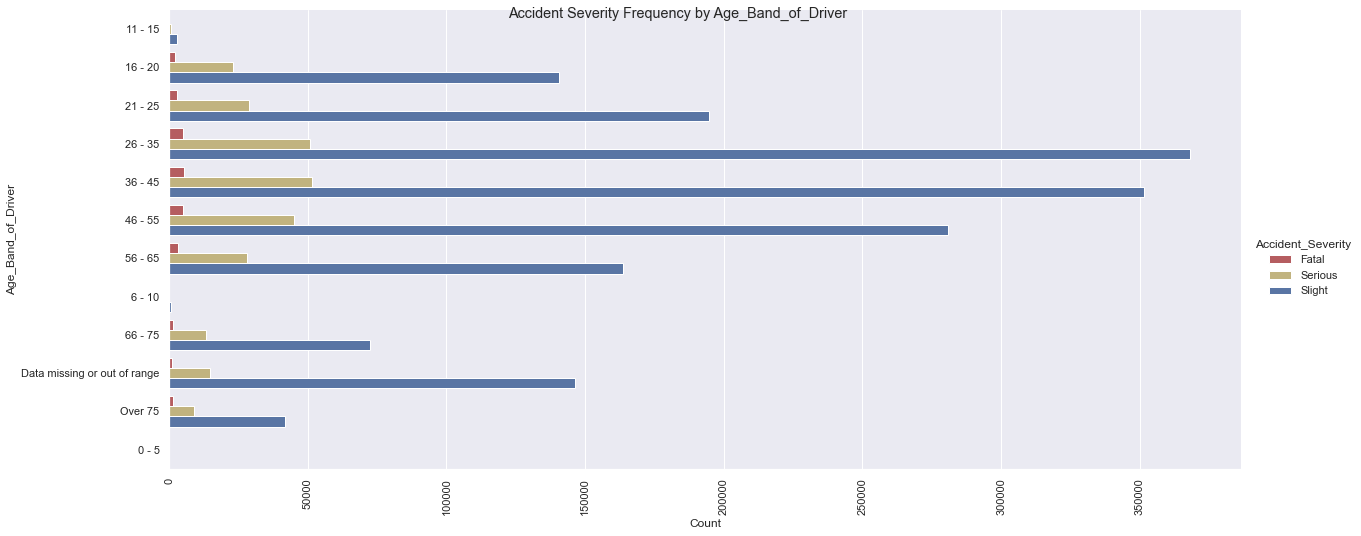

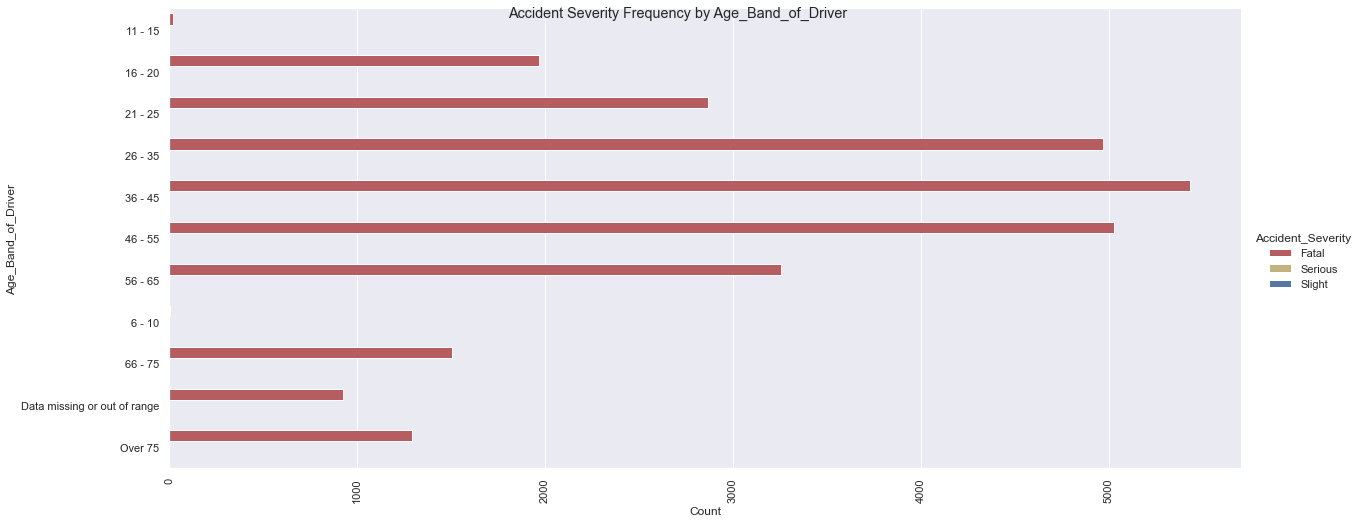

In [35]:
invlookcat(catlist[14],df)
invlookcat(catlist[14],fat)

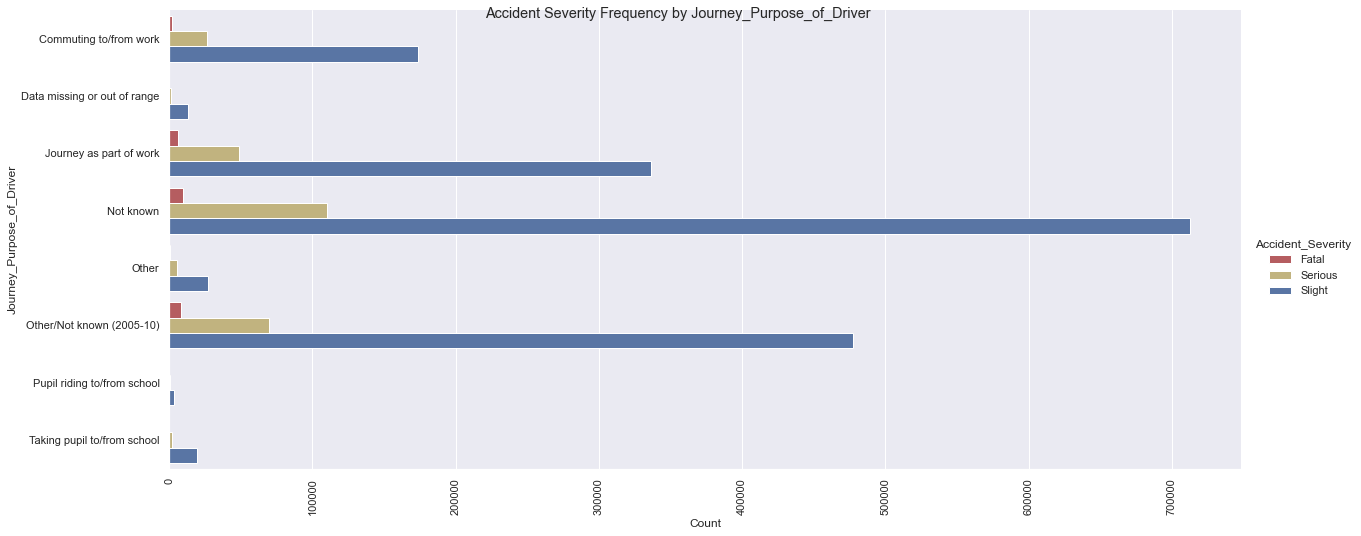

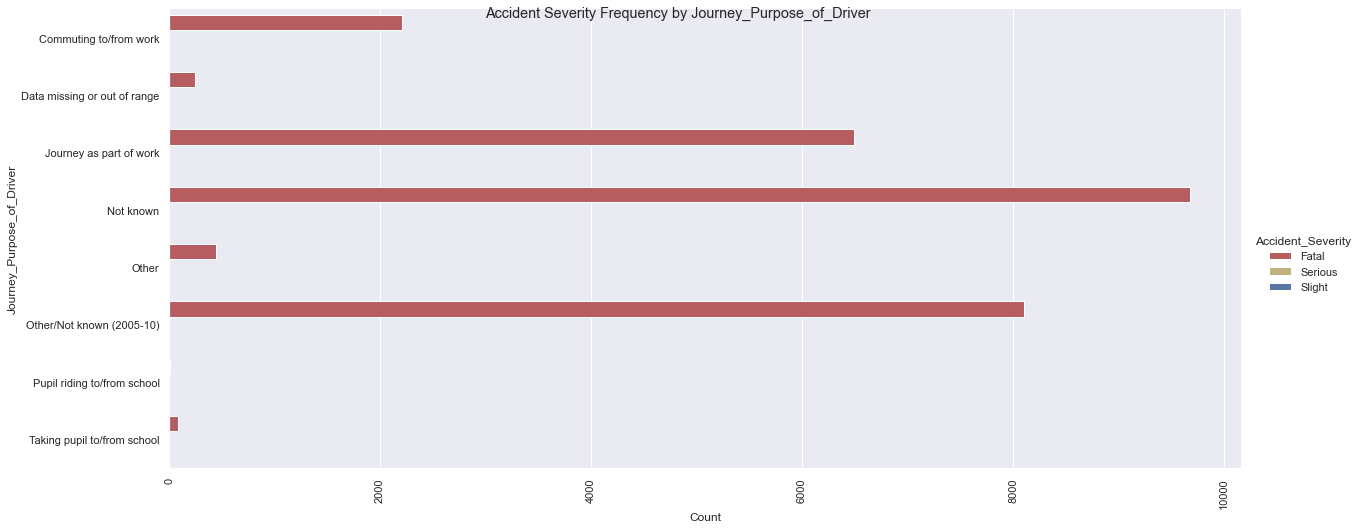

In [36]:
invlookcat(catlist[15],df)
invlookcat(catlist[15],fat)

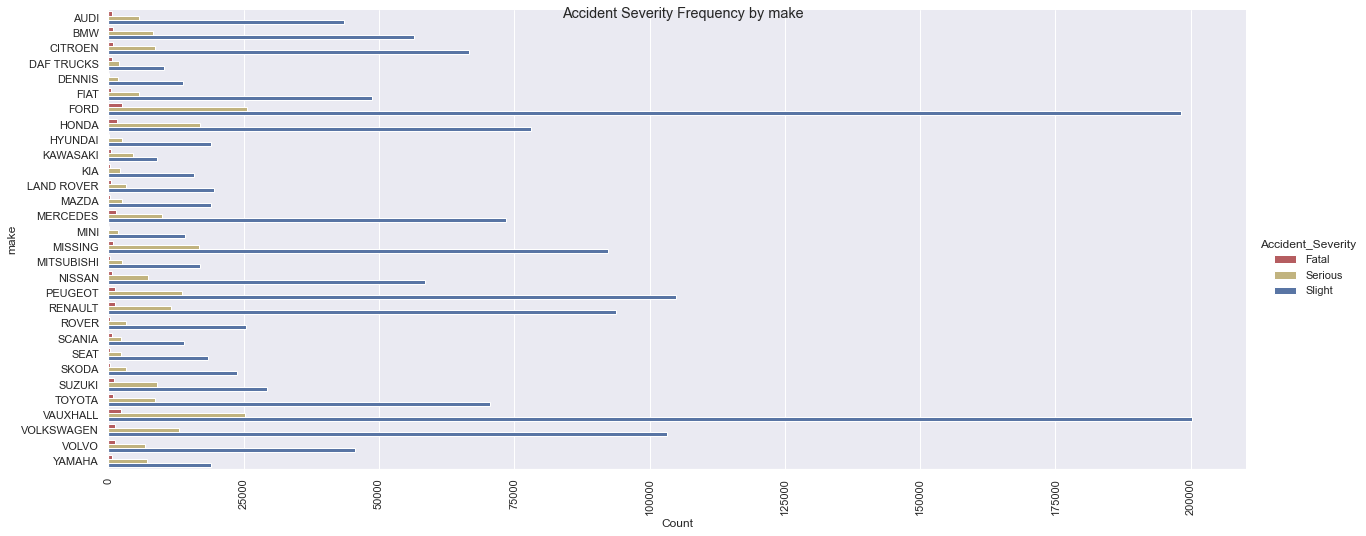

In [37]:
#Too many "makes" to display on plot, filtered down to the top 30 "makes" represented in dataset
top30makes = df[catlist[17]].value_counts().head(30).index.to_list()
accidentstop30makes = df[df[catlist[17]].isin(top30makes)]
invlookcat(catlist[17], df=accidentstop30makes,)

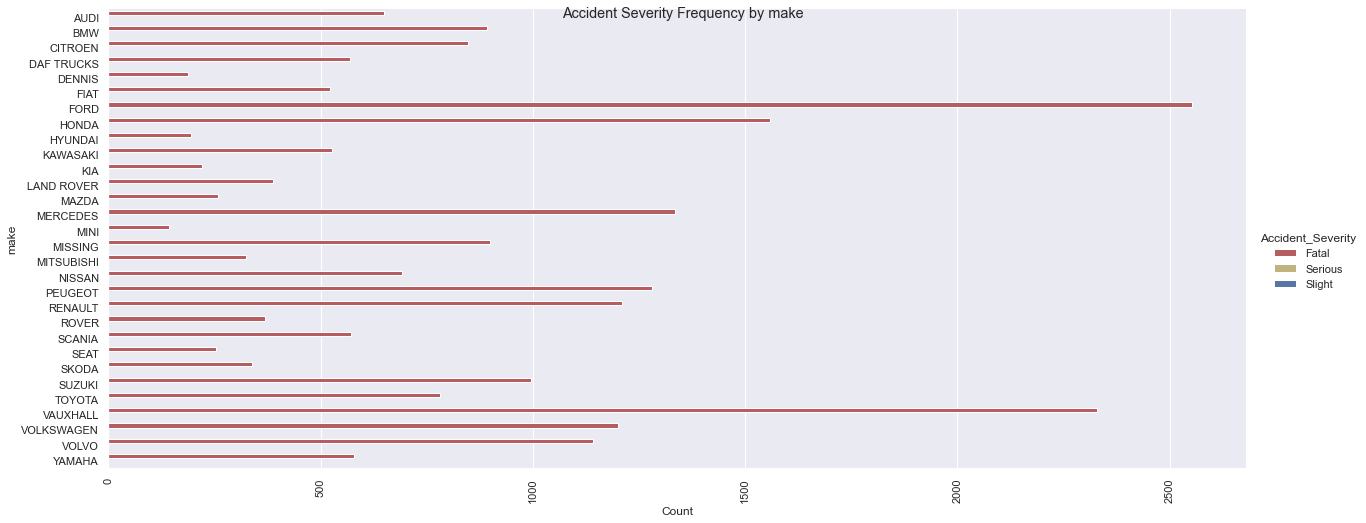

In [38]:
#Looking at Fatality counts by Make/Manufactuer
fat30 = accidentstop30makes[accidentstop30makes['Accident_Severity']=='Fatal']
invlookcat(catlist[17], fat30)

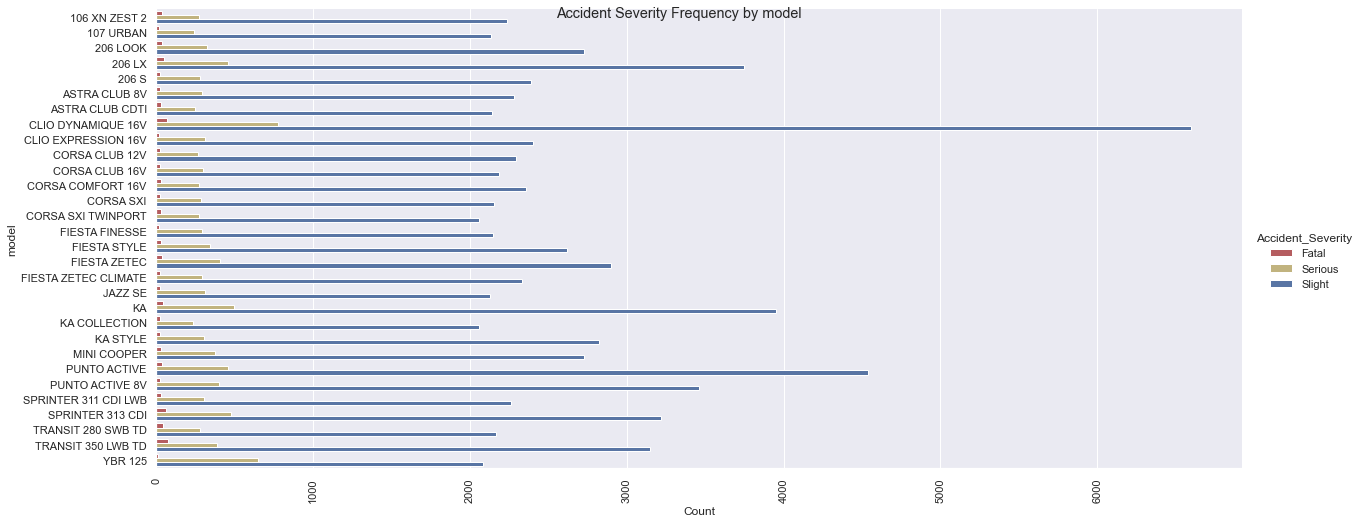

In [39]:
#Top 30 models excluding 'MISSING'
top30models = df[catlist[18]].value_counts().head(31).index.to_list()
accidentstop30models = df[df[catlist[18]].isin(top30models[1:])]
invlookcat(catlist[18], df=accidentstop30models,)

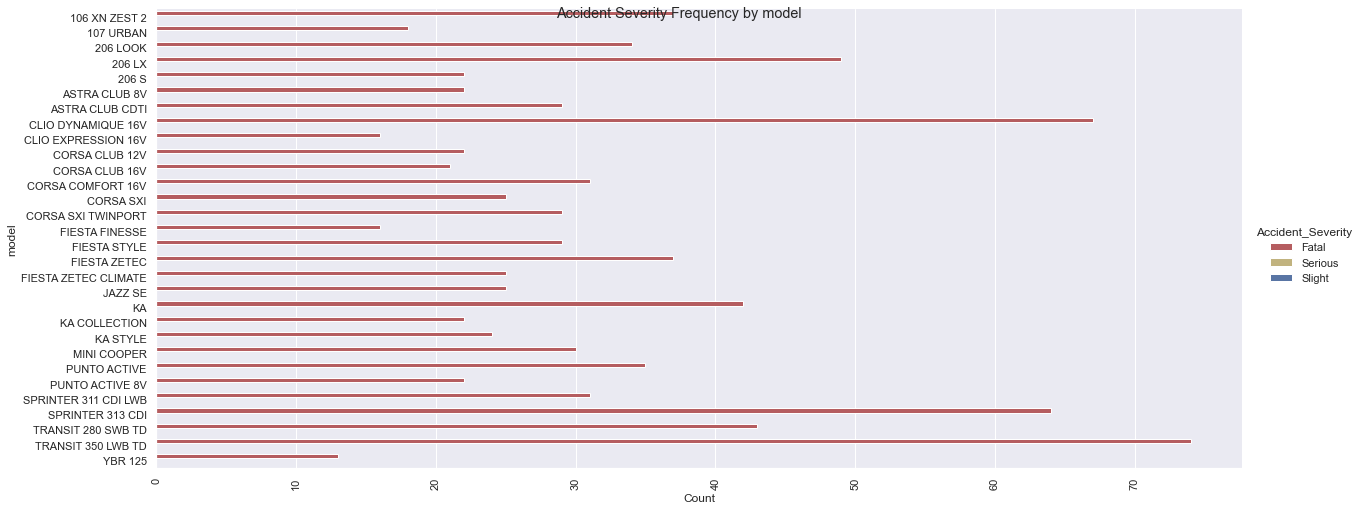

In [40]:
#Top 30 models excluding 'MISSING'
fat30 = accidentstop30models[accidentstop30models['Accident_Severity']=='Fatal']
invlookcat(catlist[18], fat30)

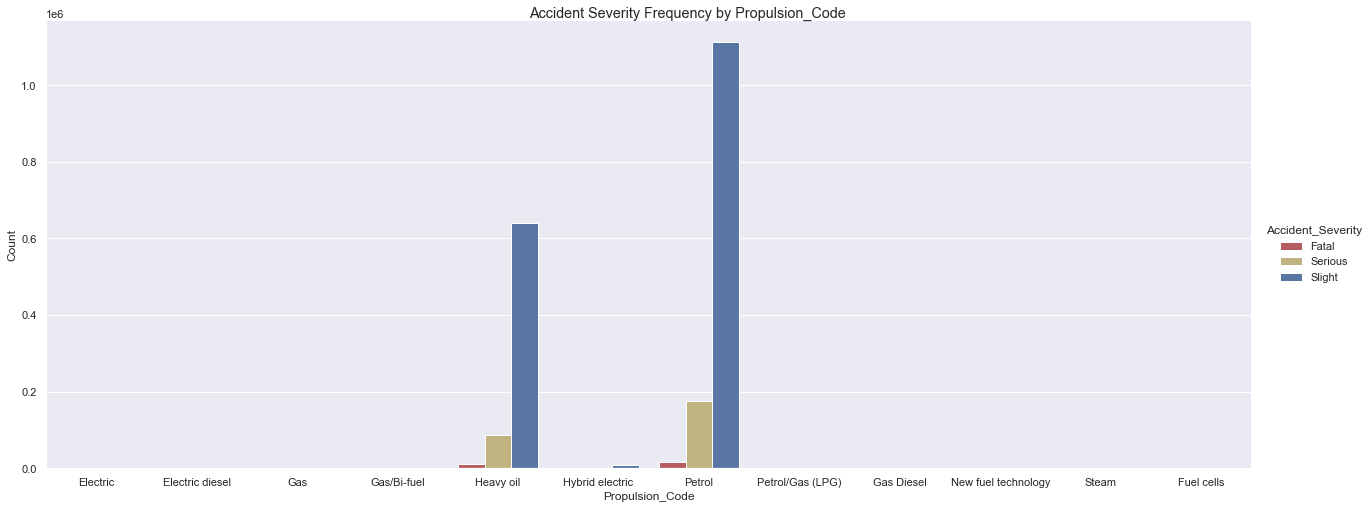

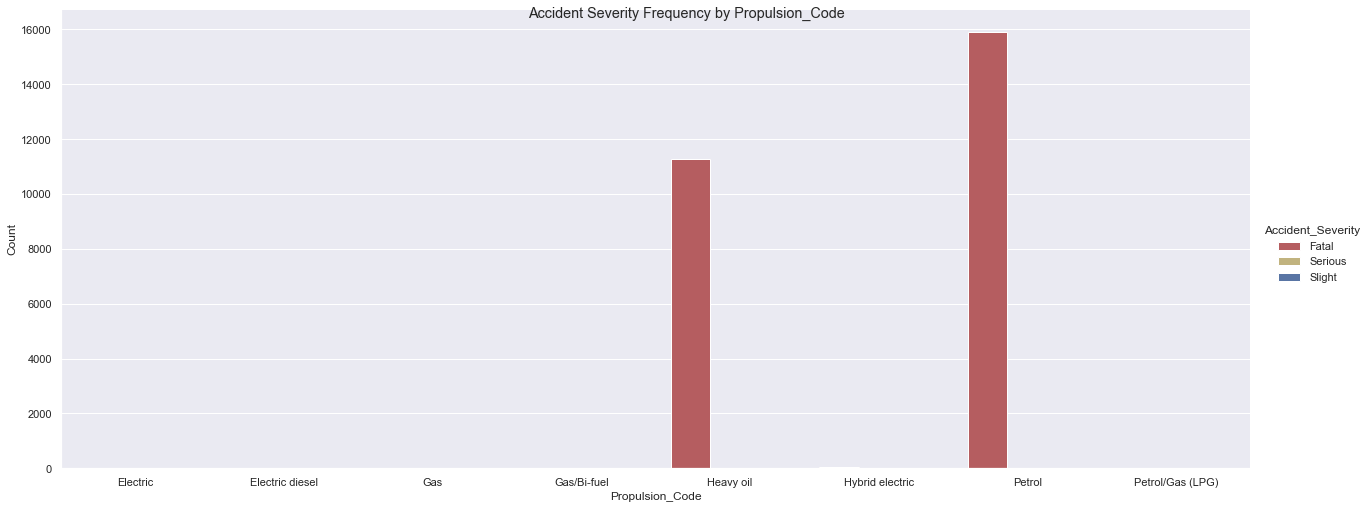

In [41]:
lookcat(catlist[19],df)
lookcat(catlist[19],fat)


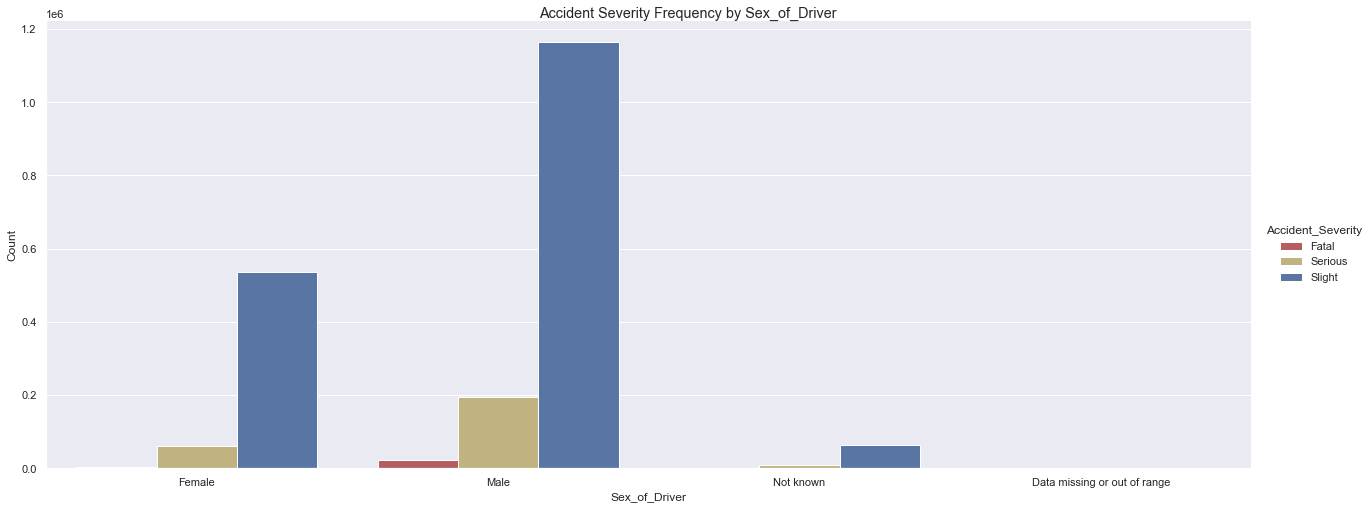

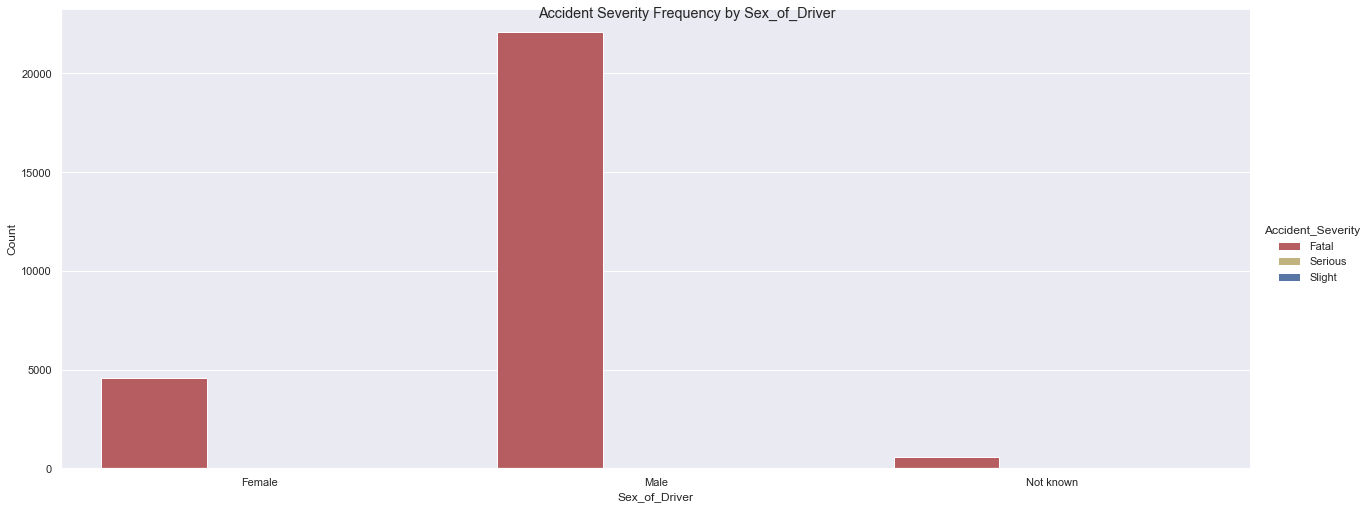

In [42]:
lookcat(catlist[20],df)
lookcat(catlist[20],fat)

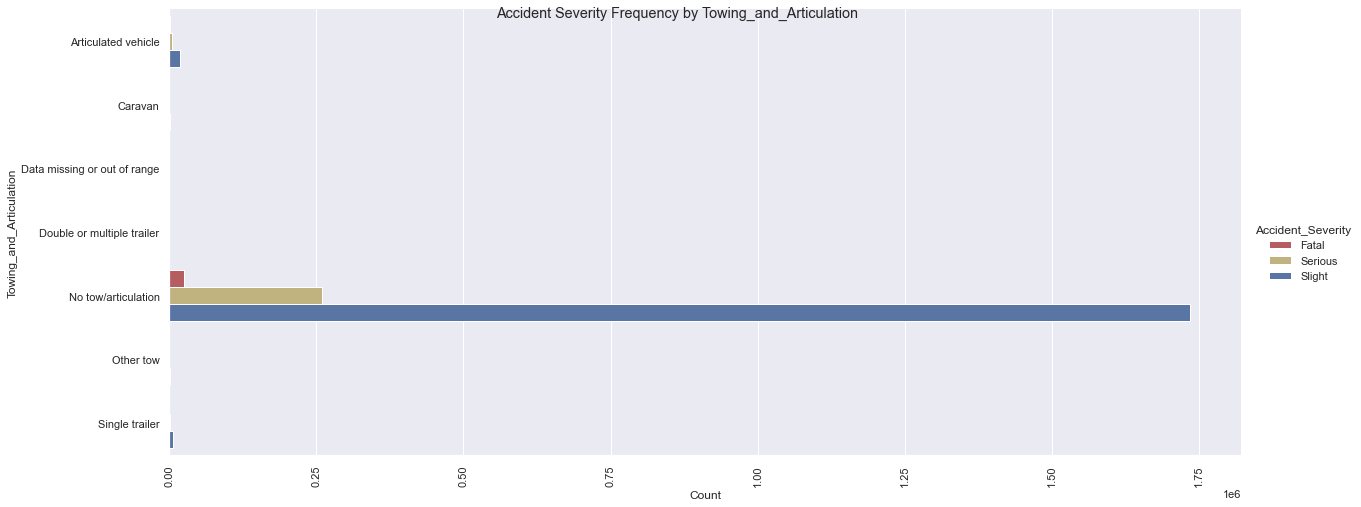

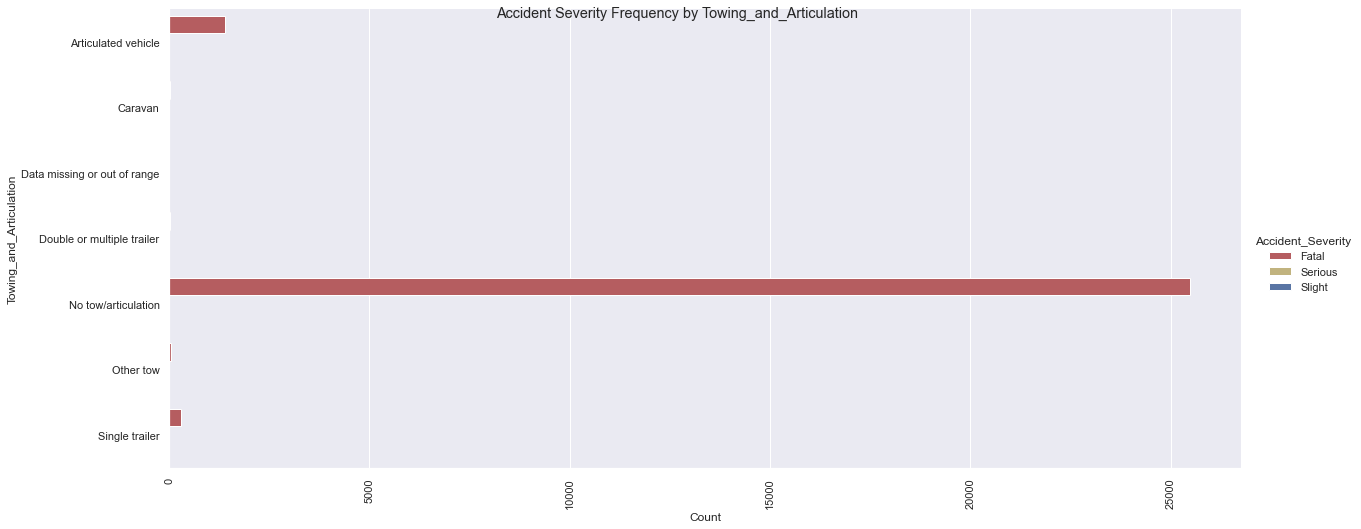

In [43]:
invlookcat(catlist[21],df)
invlookcat(catlist[21],fat)

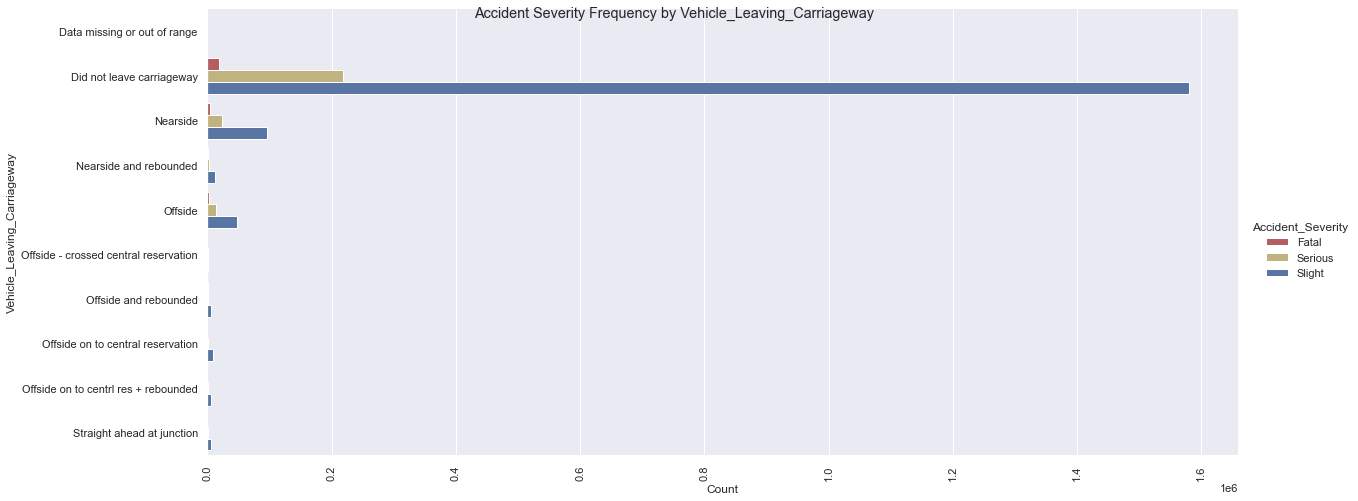

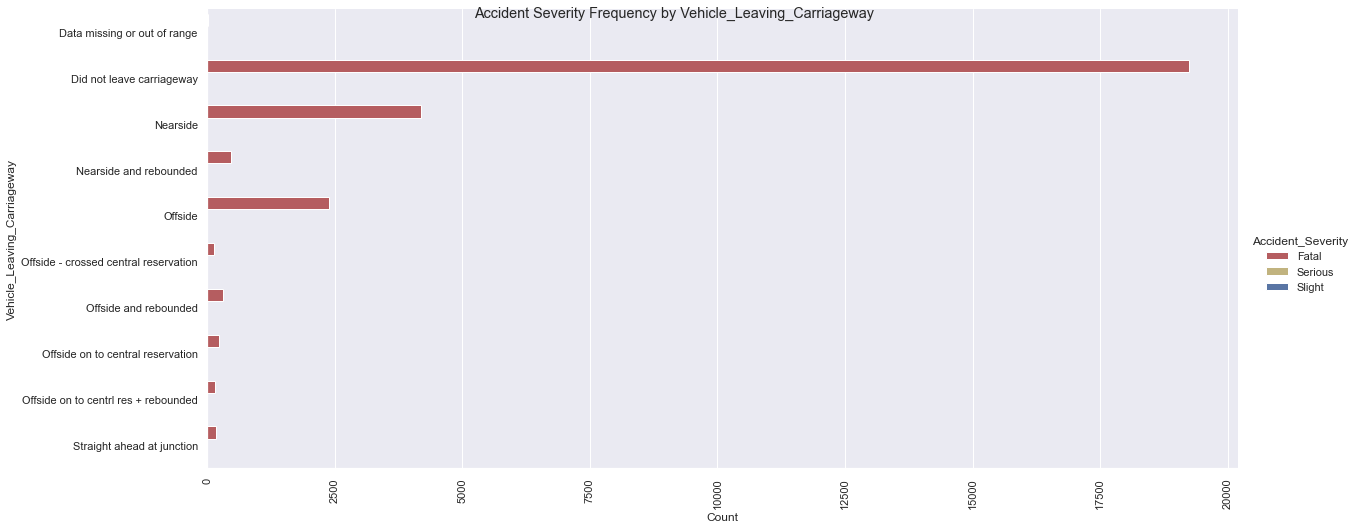

In [44]:
invlookcat(catlist[22],df)
invlookcat(catlist[22],fat)

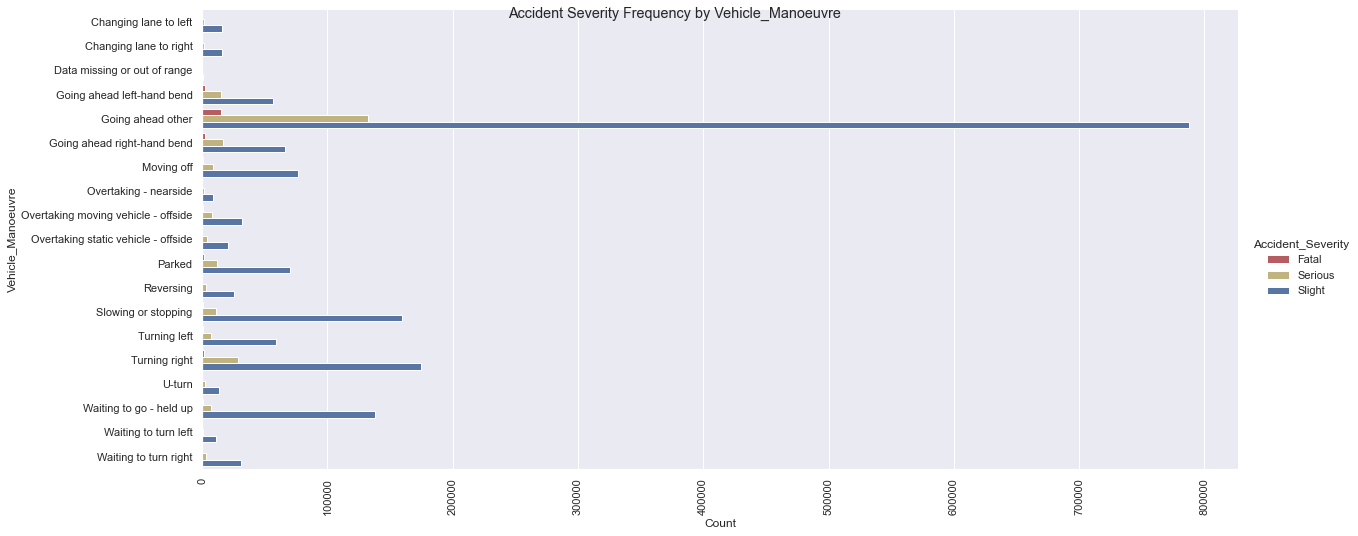

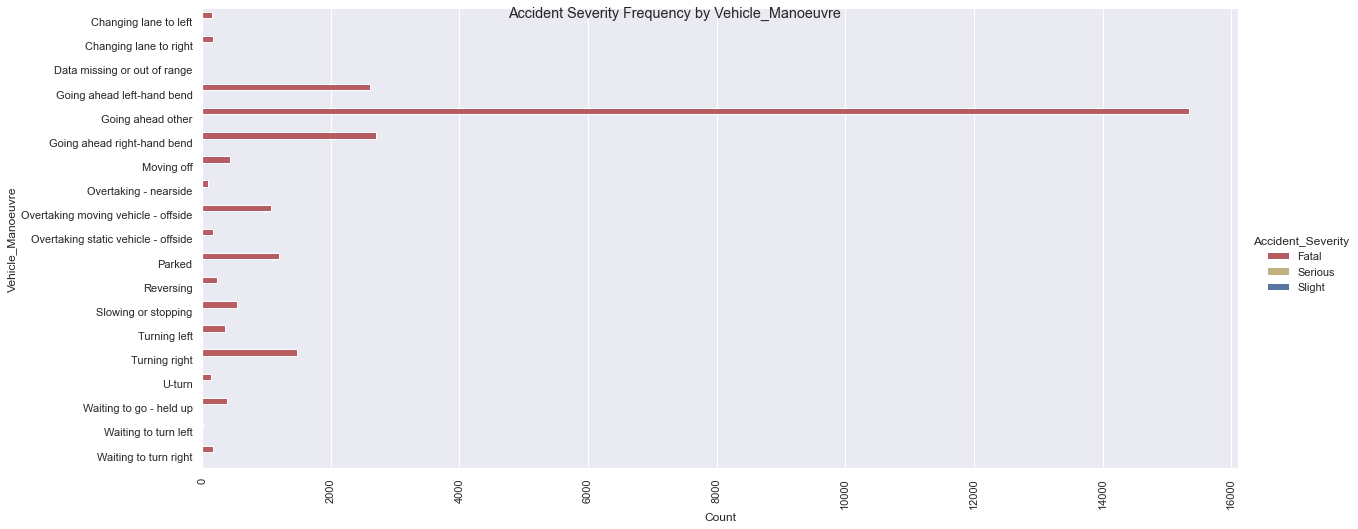

In [45]:
invlookcat(catlist[23],df)
invlookcat(catlist[23],fat)

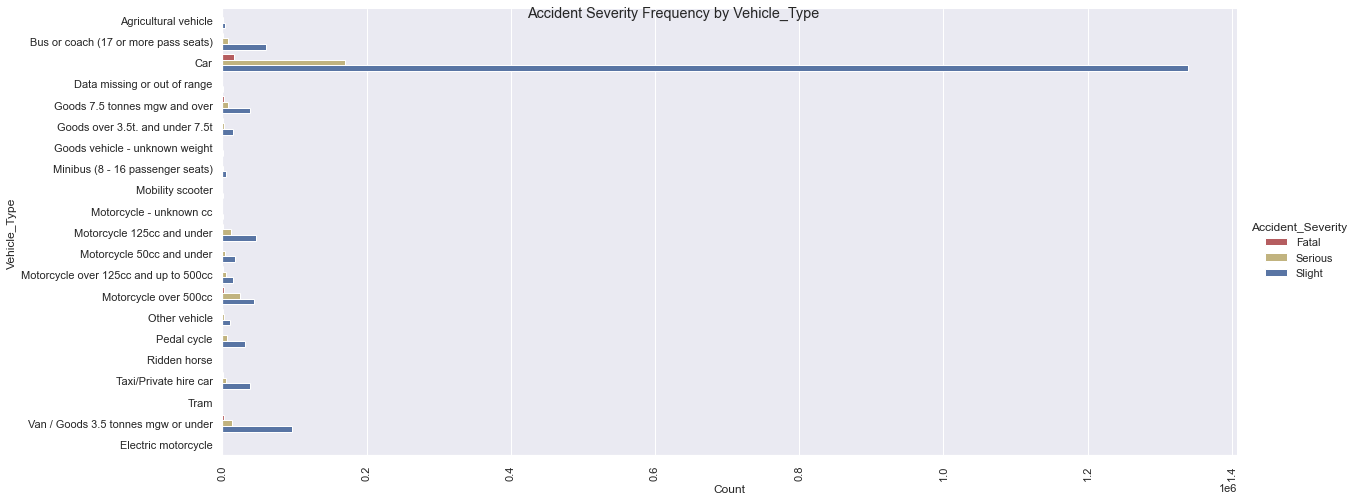

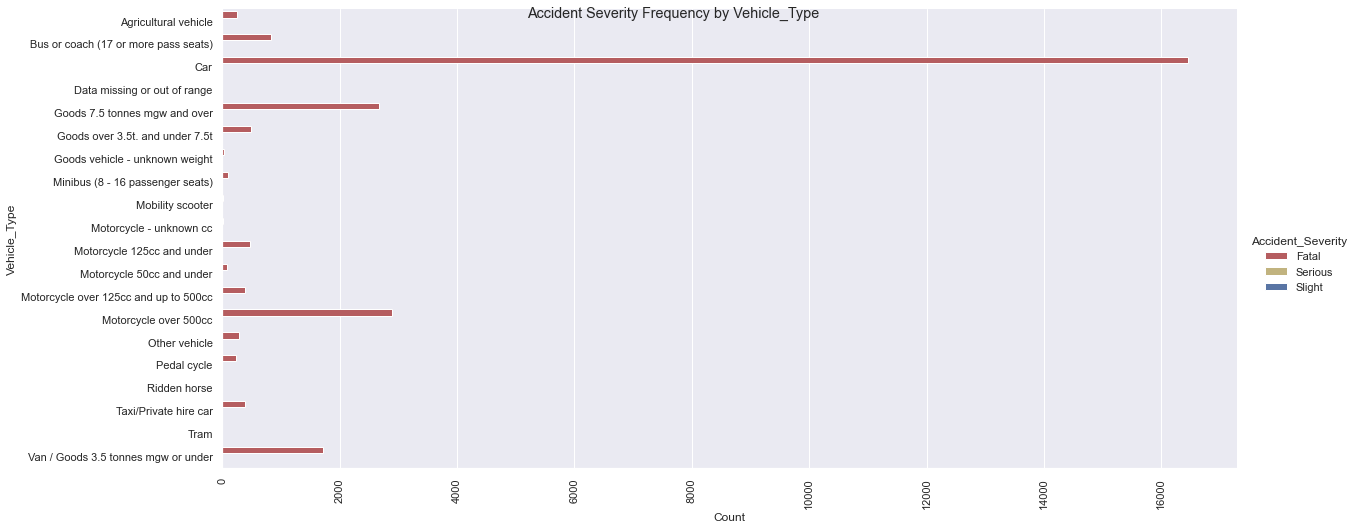

In [46]:
invlookcat(catlist[24],df)
invlookcat(catlist[24],fat)

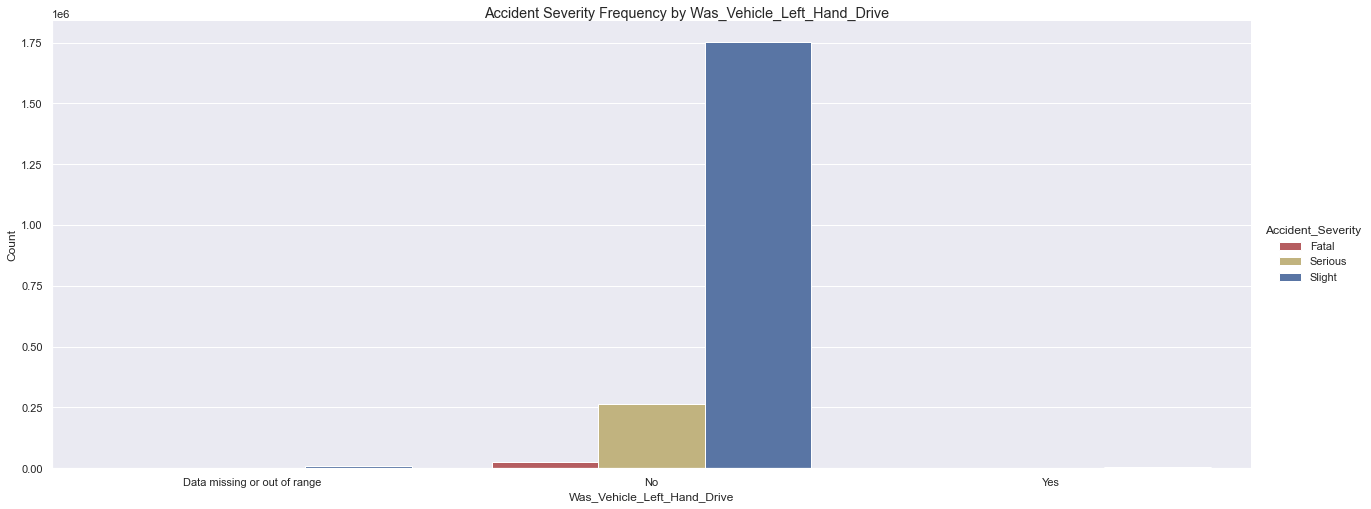

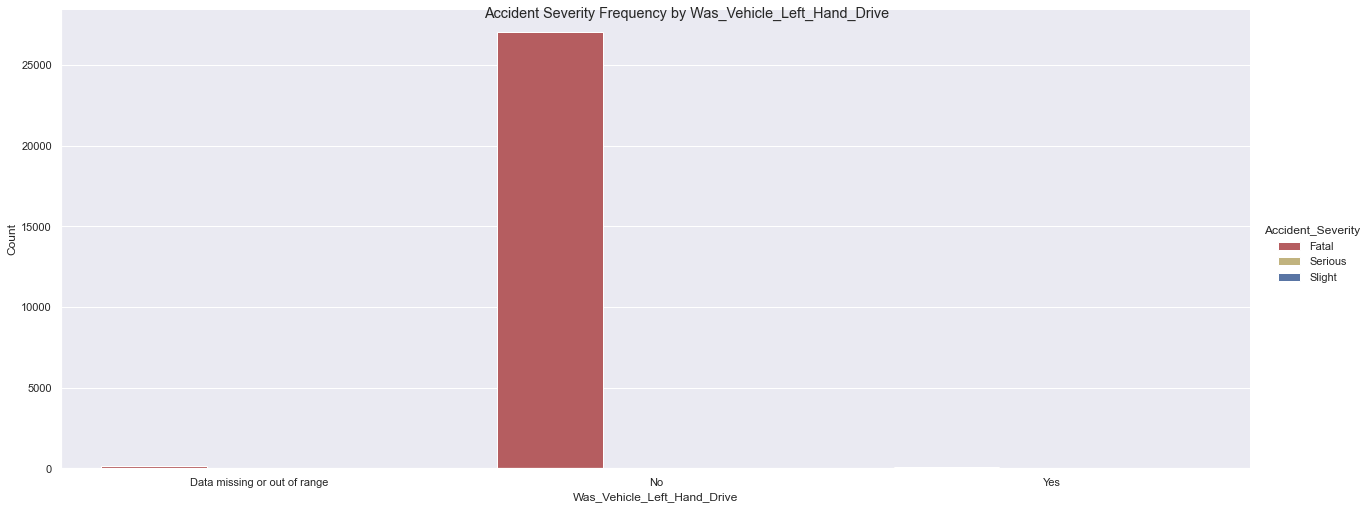

In [47]:
lookcat(catlist[25],df)
lookcat(catlist[25],fat)

# Exploration of Numeric Features

In [48]:
numlist= numdf.columns.to_list()
numlist

['Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Speed_limit',
 'Age_of_Vehicle',
 'Engine_Capacity_.CC.',
 'Vehicle_Location.Restricted_Lane',
 'Vehicle_Reference']

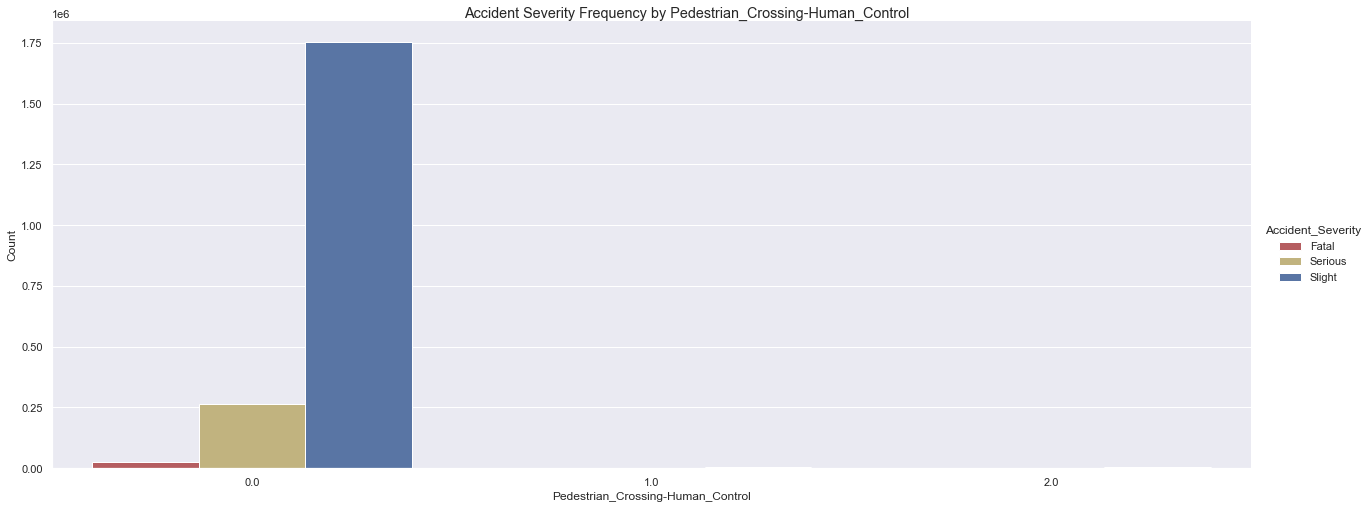

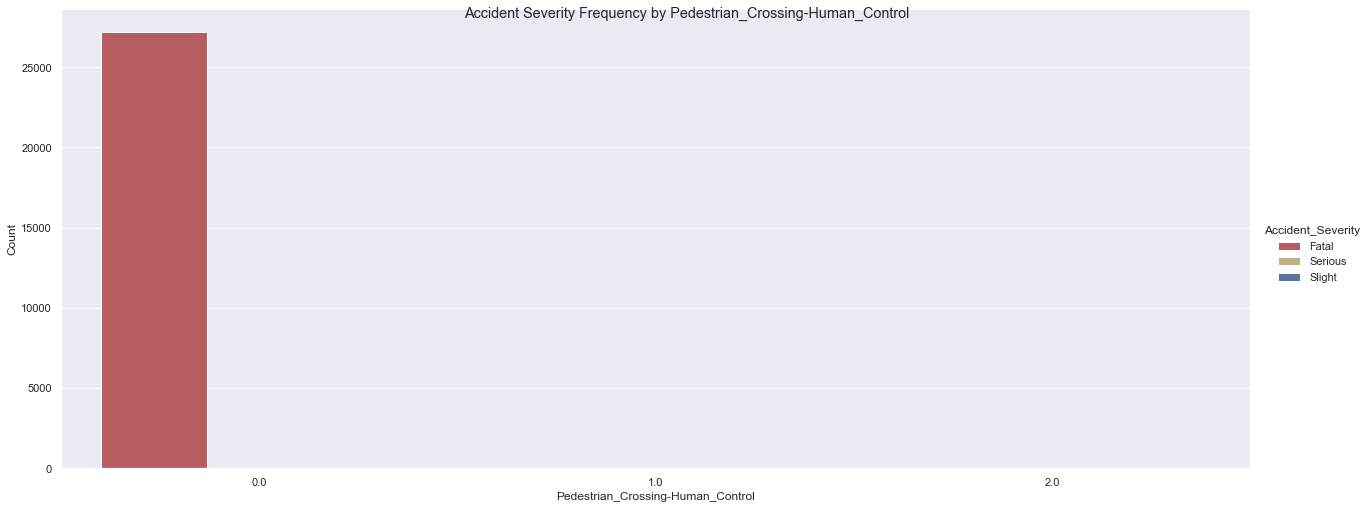

In [49]:
lookcat(numlist[0], df)
lookcat(numlist[0],fat)

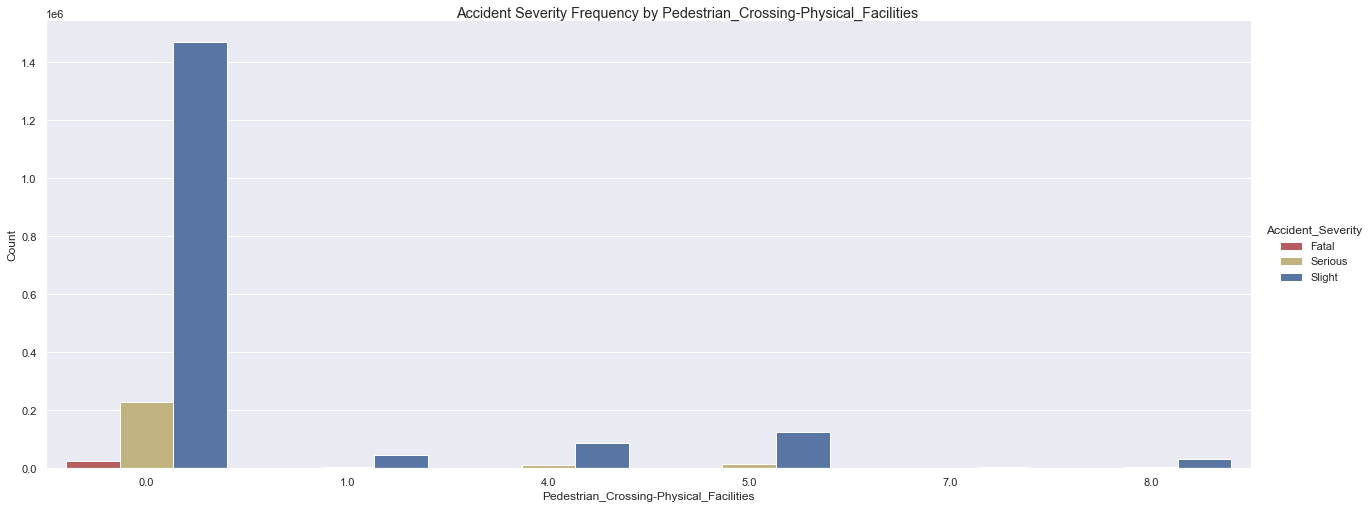

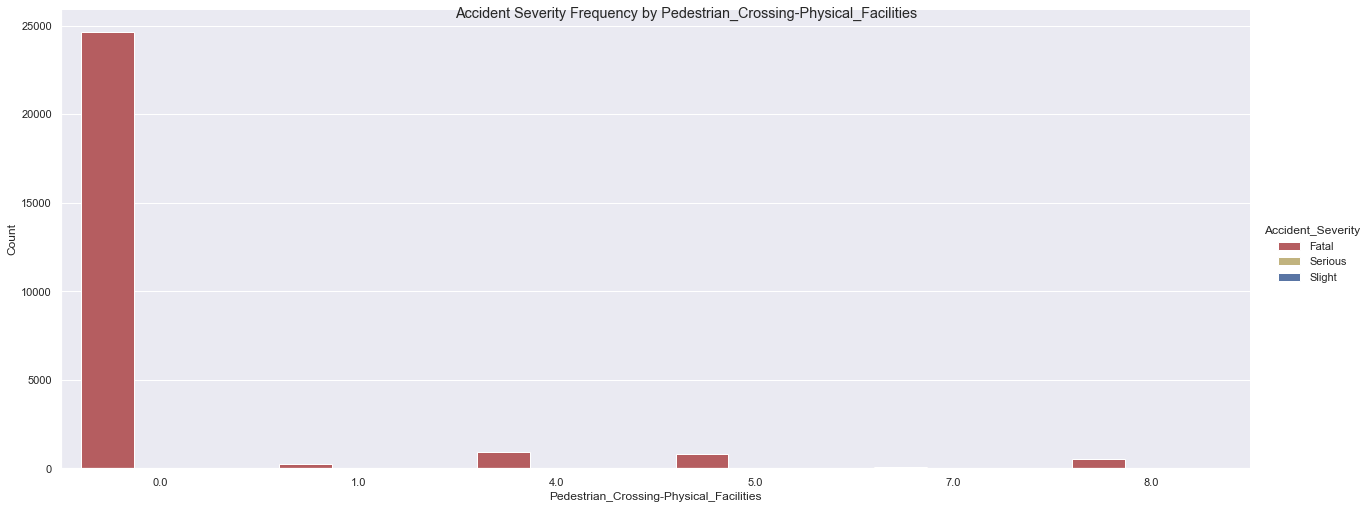

In [50]:
lookcat(numlist[1], df)
lookcat(numlist[1],fat)

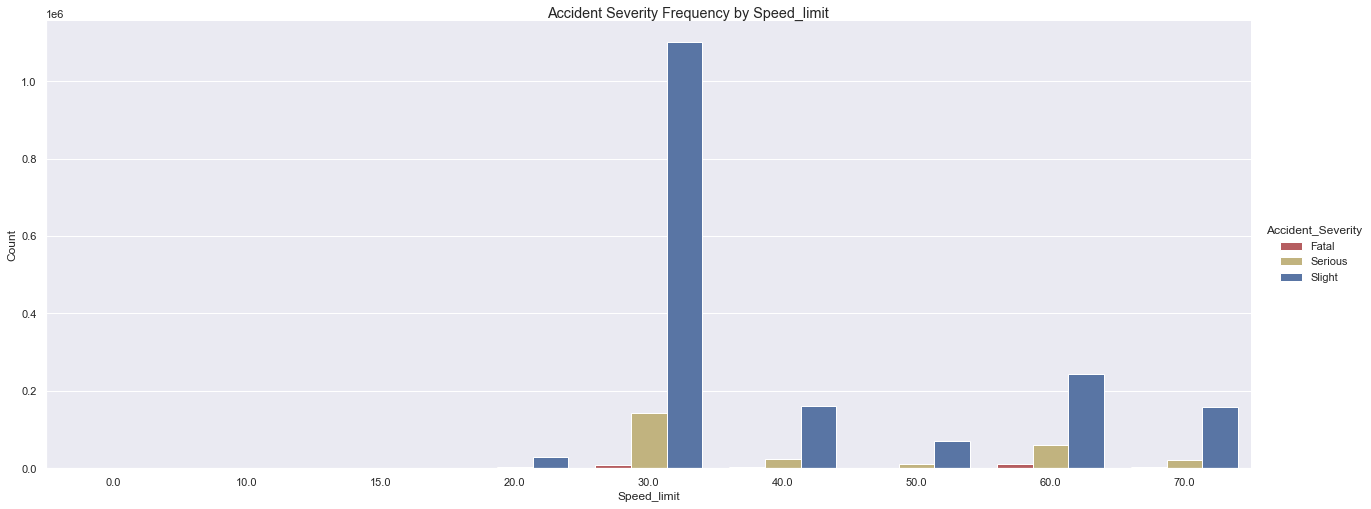

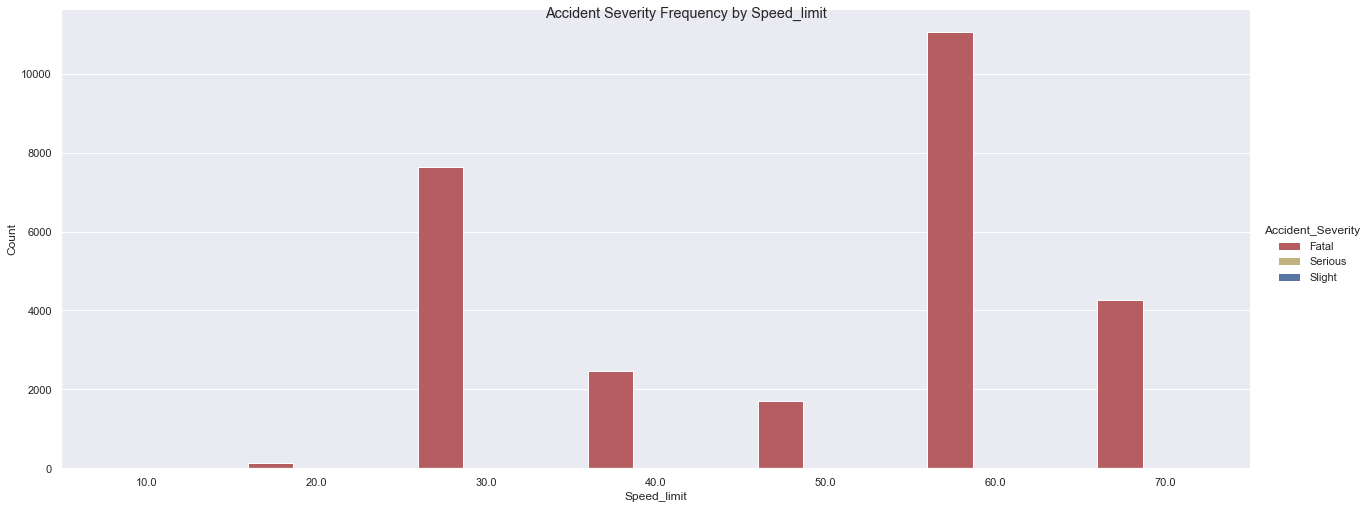

In [51]:
lookcat(numlist[2], df)
lookcat(numlist[2],fat)

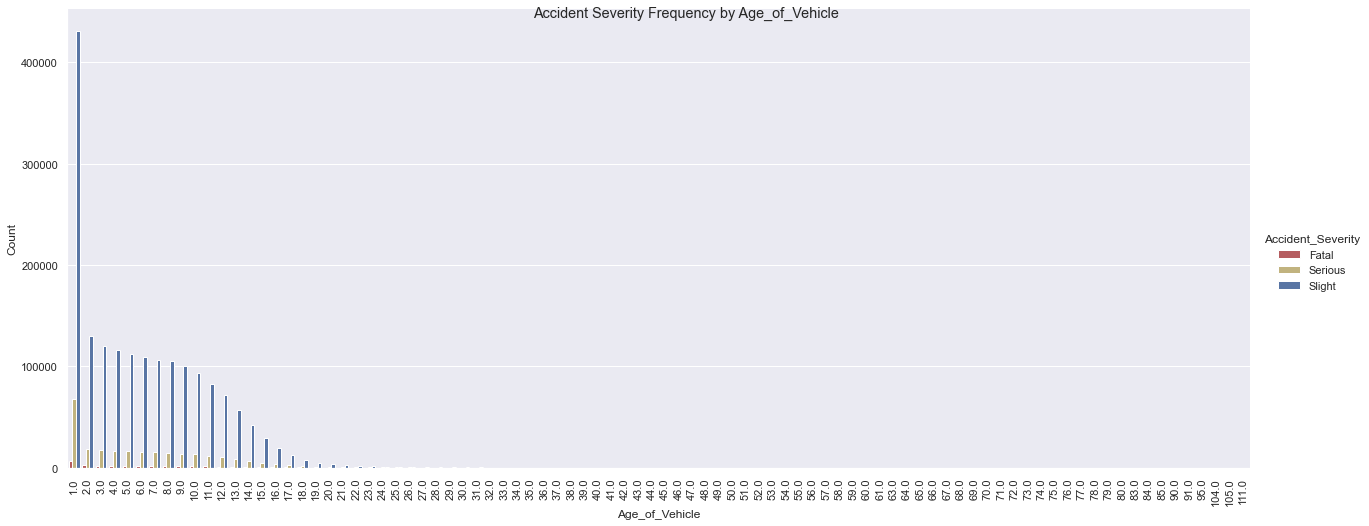

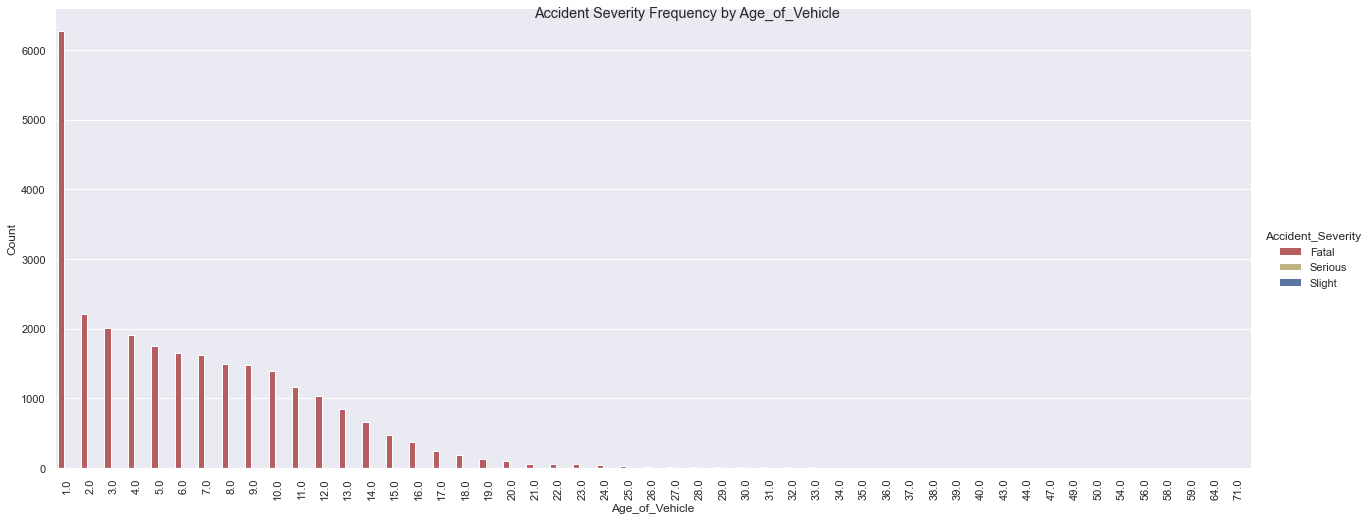

In [52]:
lookcat(numlist[3], df, rot=90)
lookcat(numlist[3],fat, rot=90)

In [53]:
#indexofcc = df[numlist[4]].value_counts().head(500).index.to_list()
#accidentstop500cc = df[df[numlist[4]].isin(indexofcc)]
#sns.scatterplot(x='Accident_Severity', y=numlist[4],data=accidentstop500cc)
#sns.catplot(x='Accident_Severity', y=numlist[4],data=accidentstop500cc, kind='swarm')
#sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

In [54]:
numdf.columns

Index(['Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Speed_limit',
       'Age_of_Vehicle', 'Engine_Capacity_.CC.',
       'Vehicle_Location.Restricted_Lane', 'Vehicle_Reference'],
      dtype='object')

<AxesSubplot:>

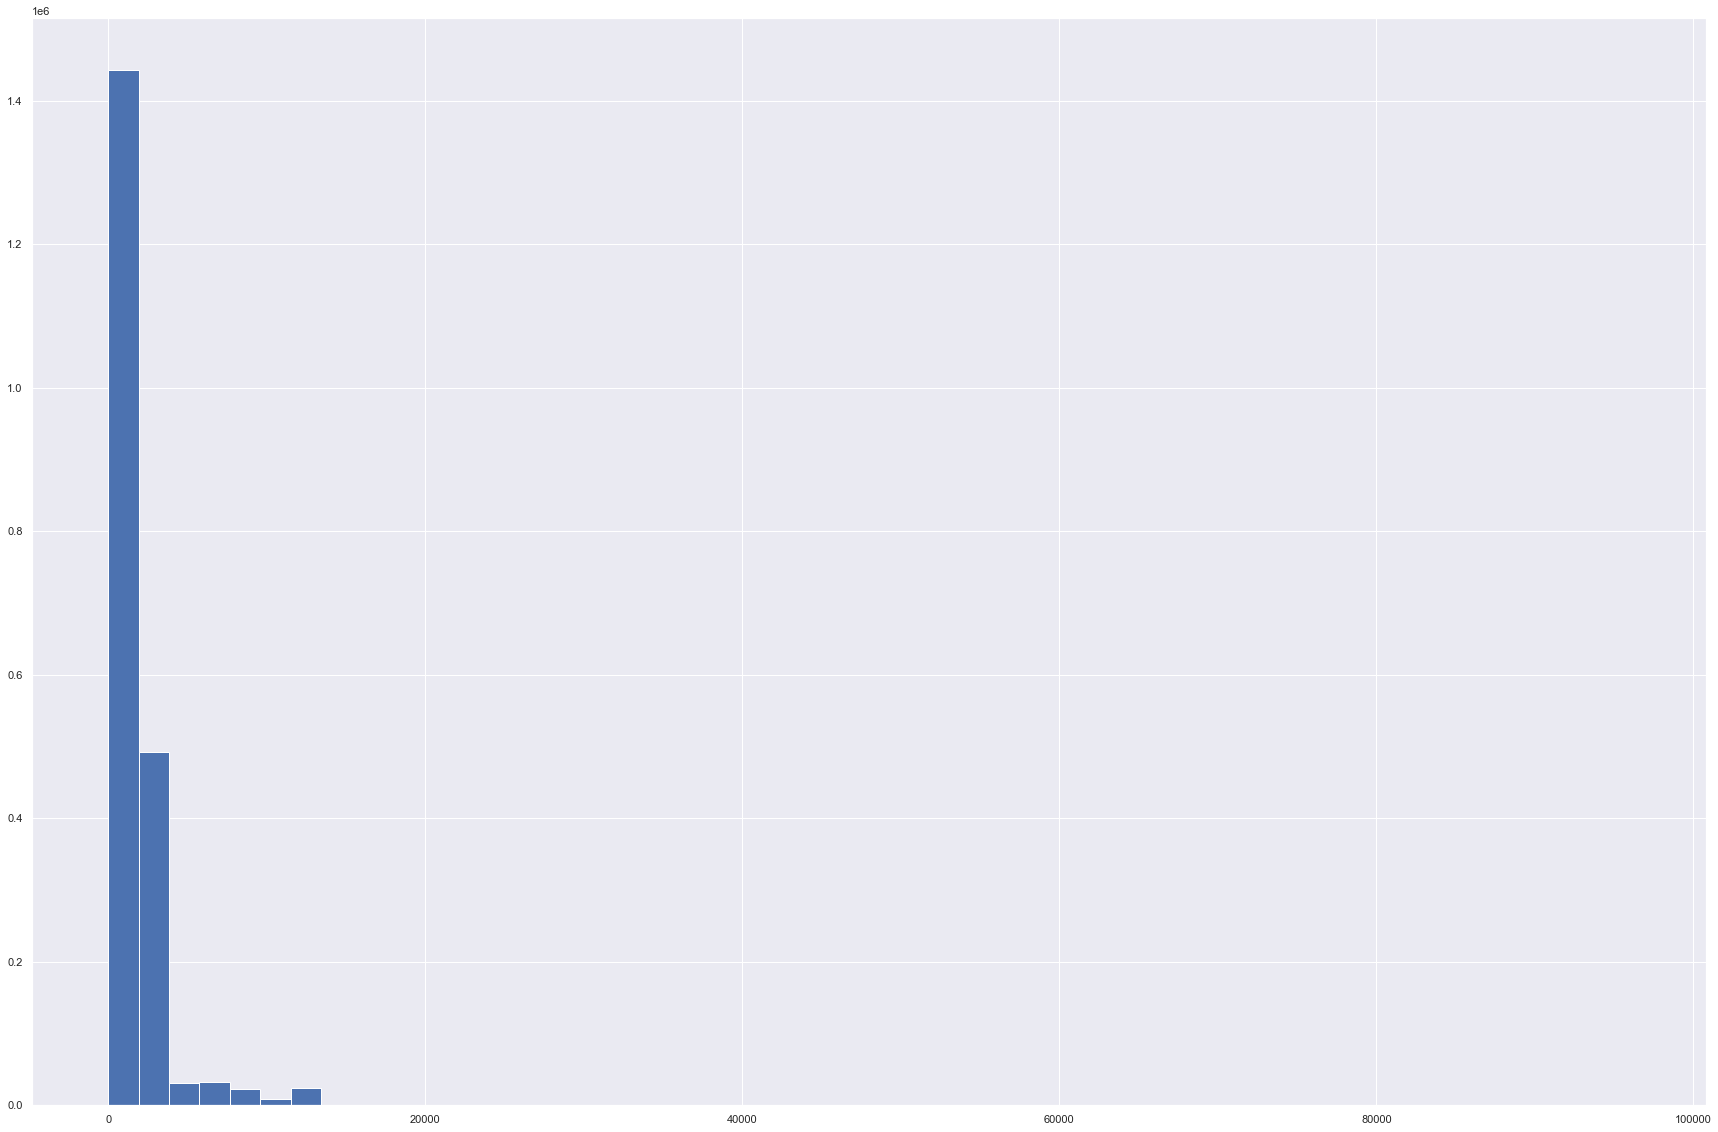

In [55]:
numdf['Engine_Capacity_.CC.'].hist(bins=50, figsize =(30,20))

Text(0.5, 1.0, 'Distribution of Engine Displacment with Outliers Removed')

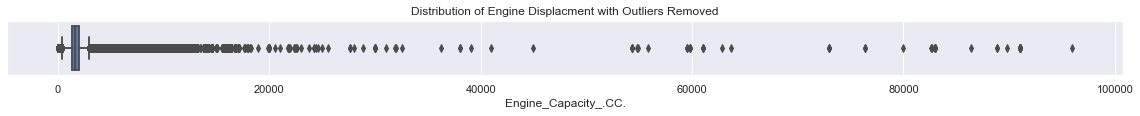

In [56]:


plt.figure(figsize=(20,1))
g= sns.boxplot(x='Engine_Capacity_.CC.' ,data=df, showfliers=True)
plt.title('Distribution of Engine Displacment with Outliers Removed')

Text(0.5, 1.0, 'Distribution of Engine Displacment with Outliers Removed')

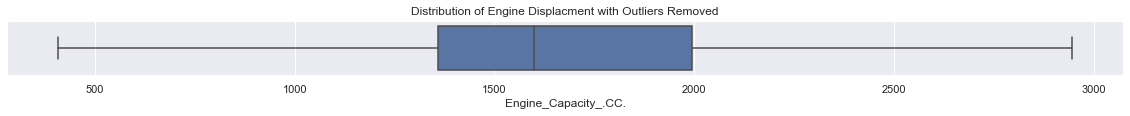

In [57]:
plt.figure(figsize=(20,1))
g= sns.boxplot(x='Engine_Capacity_.CC.' ,data=df, showfliers=False)
plt.title('Distribution of Engine Displacment with Outliers Removed')

Text(0.5, 1.0, 'Distribution of Engine Displacment with Outliers Removed')

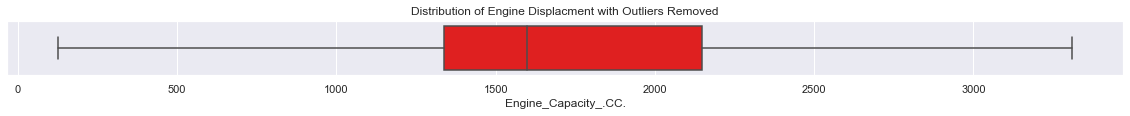

In [58]:
plt.figure(figsize=(20,1))
g= sns.boxplot(x='Engine_Capacity_.CC.' ,data=fat, showfliers=False, color='Red')
plt.title('Distribution of Engine Displacment with Outliers Removed')

<AxesSubplot:title={'center':'Distribution of Engine Displacment with Outliers Removed'}, xlabel='Accident_Severity', ylabel='Engine_Capacity_.CC.'>

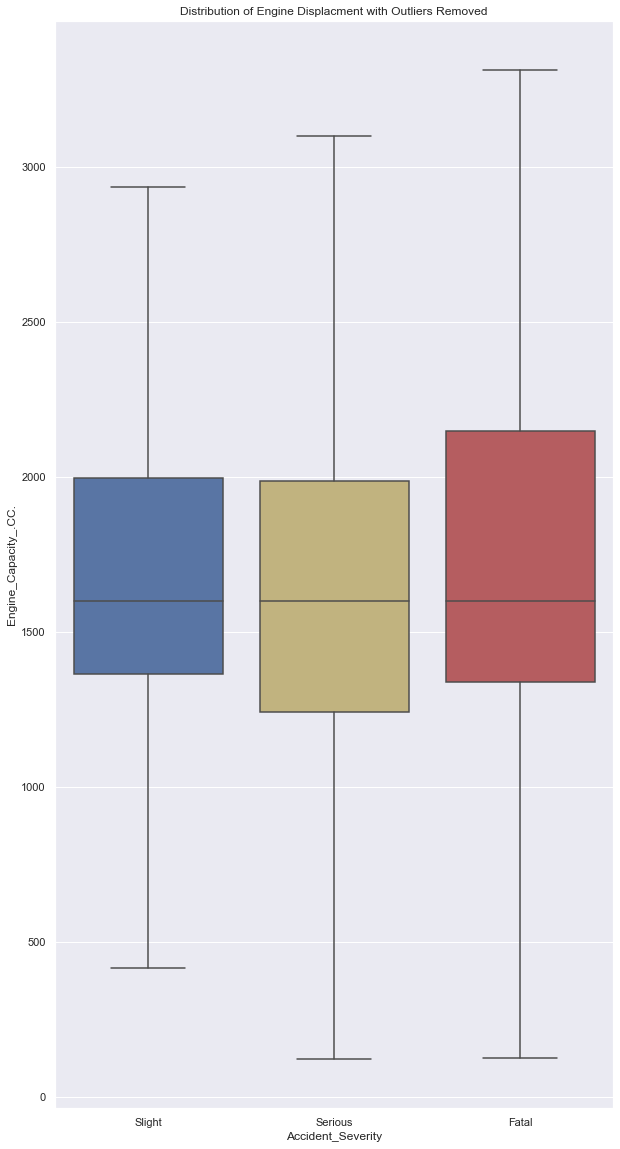

In [59]:
plt.figure(figsize=(10,20))
plt.title('Distribution of Engine Displacment with Outliers Removed')
sns.boxplot(x='Accident_Severity', y ='Engine_Capacity_.CC.', data=df, showfliers=False, palette=['b', 'y','r'])

<AxesSubplot:title={'center':'Distribution of Engine Displacment with Outliers Removed'}, xlabel='Accident_Severity', ylabel='Engine_Capacity_.CC.'>

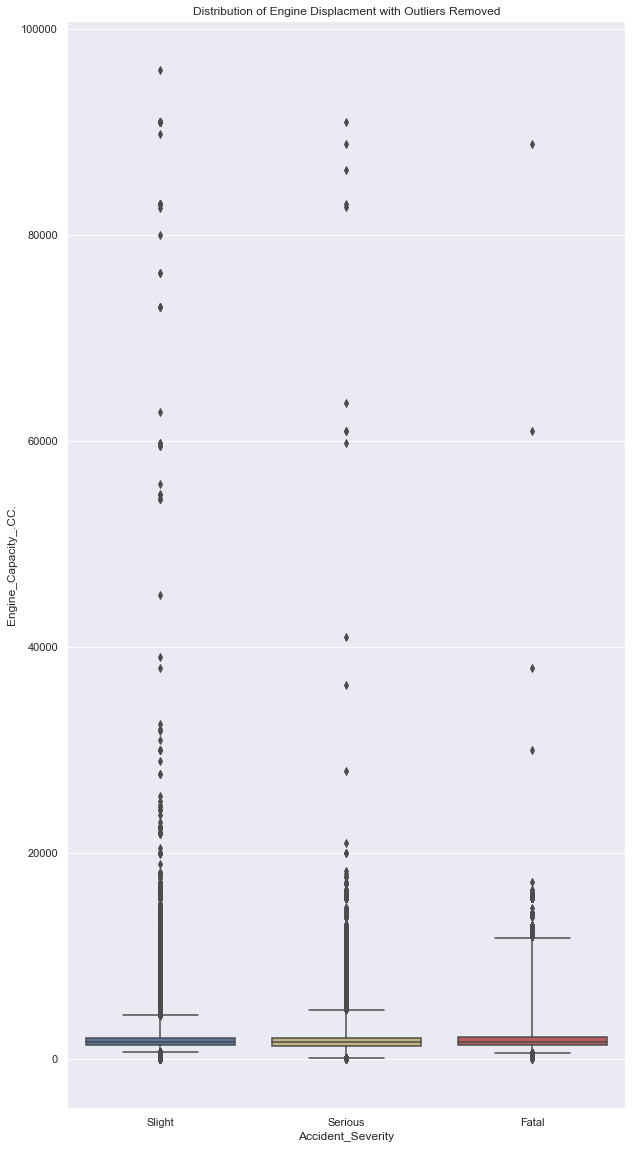

In [60]:
plt.figure(figsize=(10,20))
plt.title('Distribution of Engine Displacment with Outliers Removed')
sns.boxplot(x='Accident_Severity', y ='Engine_Capacity_.CC.', data=df, showfliers=True, whis=(5,95), palette = ['b', 'y','r'])

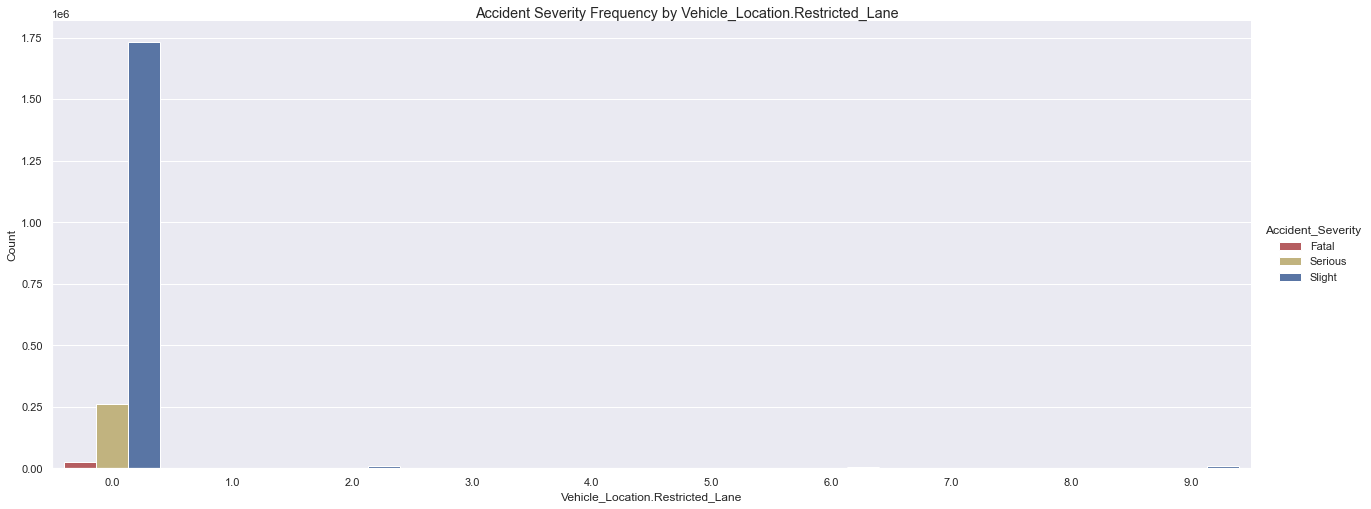

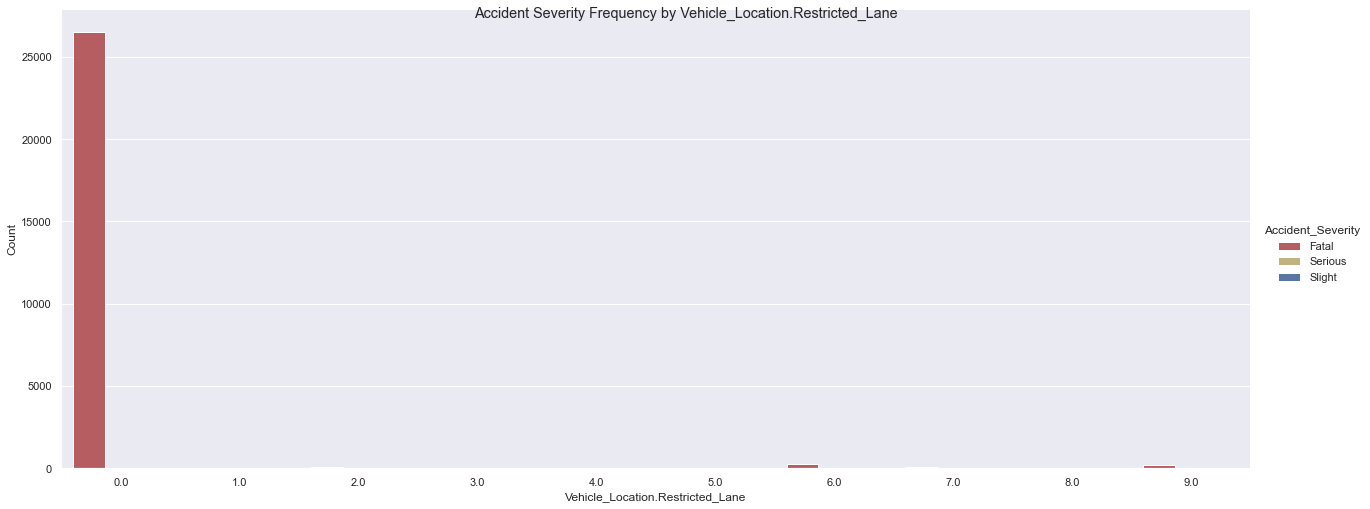

In [61]:
lookcat(numlist[5], df)
lookcat(numlist[5], fat)

# Further Feature adjustments/Removal

In [62]:
#Nearly All values fall into category, drop column
df.drop(columns = ['Vehicle_Location.Restricted_Lane'],inplace=True) # All observations are nearly identical.
#Also Drop date and Time
df.drop(columns = ['Date'],inplace=True) # duplicate included in Datetime
df.drop(columns = ['Time'],inplace=True) # duplicate included in Datetime
df.drop(columns = ['model'],inplace=True)# because there are too many to onehot encode
df.drop(columns = ['make'],inplace=True) #because there are too many to onehot encode

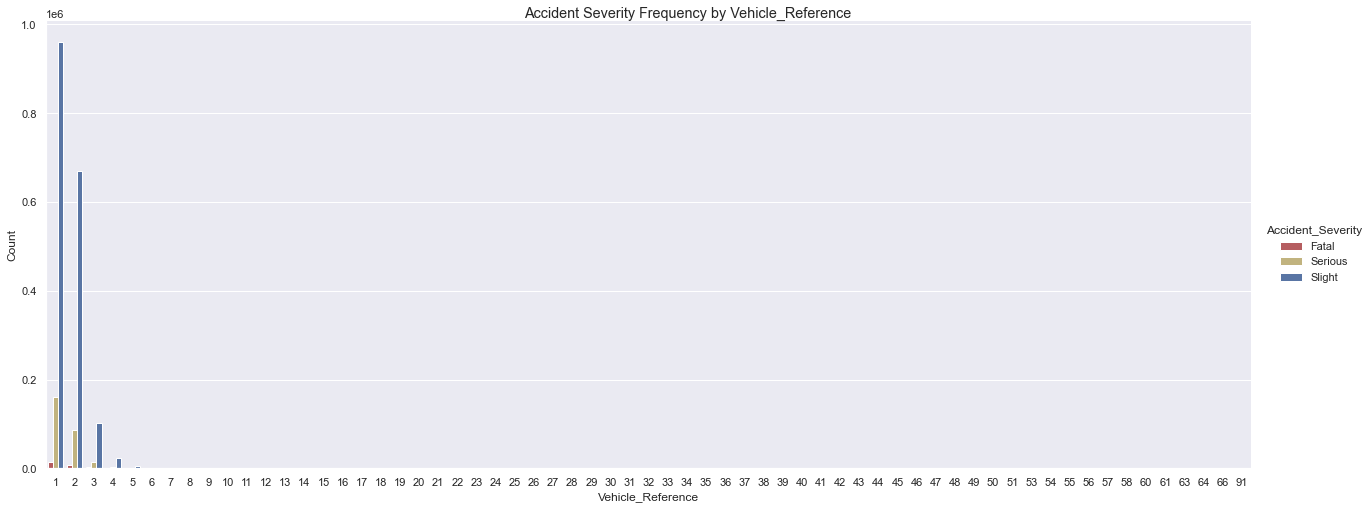

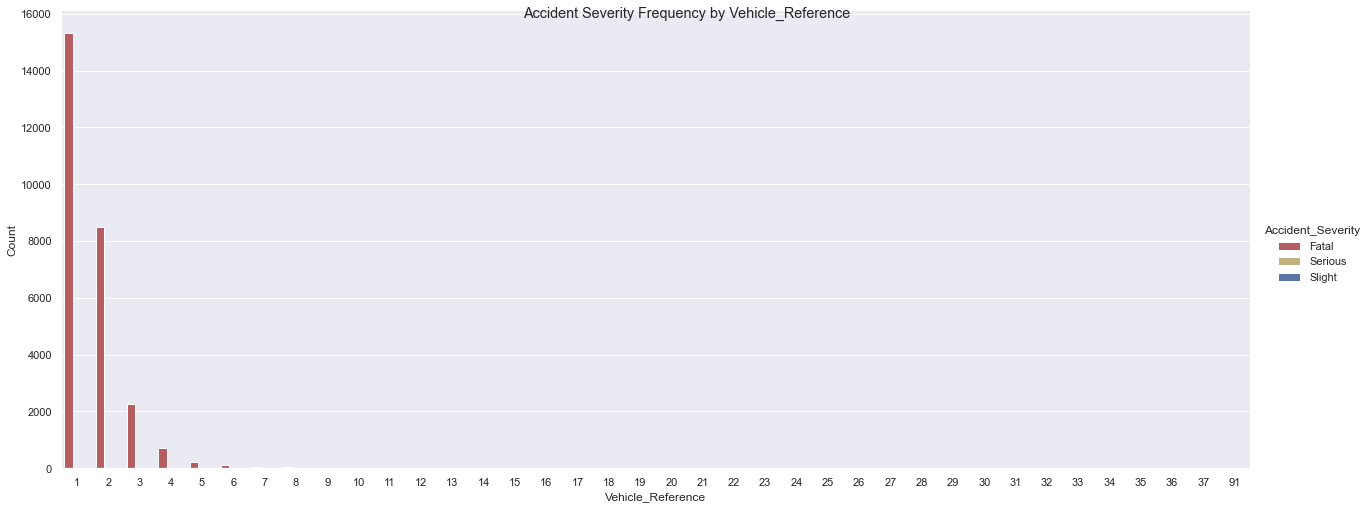

In [63]:
lookcat(numlist[6], df)
lookcat(numlist[6], fat)

In [64]:
#Set Target and Explantory Variables
y = df['Accident_Severity']
X = df.drop(columns = ['Accident_Severity'])

In [65]:
#Reset Index
X.set_index('Accident_Index', inplace=True)

In [66]:
#Get dummies for Target
y = pd.get_dummies(y)

In [67]:
catdf2 = X.select_dtypes(include=['object'])
catlist2 = catdf2.columns.to_list()
catlist2[1:]


['Day_of_Week',
 'Junction_Control',
 'Junction_Detail',
 'Light_Conditions',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Weather_Conditions',
 'Age_Band_of_Driver',
 'Journey_Purpose_of_Driver',
 'Junction_Location',
 'Propulsion_Code',
 'Sex_of_Driver',
 'Towing_and_Articulation',
 'Vehicle_Leaving_Carriageway',
 'Vehicle_Manoeuvre',
 'Vehicle_Type',
 'Was_Vehicle_Left_Hand_Drive']

In [68]:
#Running out of space need help with this I think

#emp = pd.DataFrame(X.index)
#for i in catlist2[1:4]:
#    dummies= pd.get_dummies(X[i], prefix=i)
#    dummies = dummies.reset_index()
#    emp = pd.merge(emp, dummies, left_on='Accident_Index', right_on='Accident_Index')
#emp